In [7]:
from headers import *
import pandas as pd
import numpy as np
from utils.custom_train_test_split import *
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
from analysis.training_helper import trainPipeline, drawFrom1results

In [8]:
cutoffs = [0.0, 0.01, 0.02, 0.03, 0.05, 0.07, 0.10, 0.15, 0.20, 0.25, 0.35]
files = ['../data/deduplicated/combined_inner_ticker.csv']
thresholds = [70, 80, 90, 95]

In [9]:
trainDf, testDf = per_year_train_test_split(files, format='%Y-%m-%d')
resultsToPlotYear = trainPipeline(cutoffs, yAlpha, trainDf, testDf, thresholds)
balancedResultsYear = trainPipeline(cutoffs, yAlpha, trainDf, testDf, thresholds, isBalanced=True)

trainDfCompany, testDfCompany = custom_train_test_split(files)
resultsToPlotCompany = trainPipeline(cutoffs, yAlpha, trainDfCompany, testDfCompany, thresholds)
balancedResultsCompany = trainPipeline(cutoffs, yAlpha, trainDfCompany, testDfCompany, thresholds, isBalanced=True)

trainDfRand, testDfRand = train_test_split(joinDfs(files))
resultsToPlotRand = trainPipeline(cutoffs, yAlpha, trainDfRand, testDfRand, thresholds)
balancedResultsRand = trainPipeline(cutoffs, yAlpha, trainDfRand, testDfRand, thresholds, isBalanced=True)

-----------------
% of True in dataset 50.92% resulted in 24.61% and median 17.28%
MODEL tree
For alpha1Year, yCutoff = 0.0, taken used - 5039 is 47.74%
Mean was 4.6%, median was 1.52%
MODEL svc
For alpha1Year, yCutoff = 0.0, taken used - 3936 is 37.29%
Mean was 5.1%, median was 1.37%
% of True taken with threshold 70 adjustment -  3167
For threshold data - mean was 5.63%, median was 1.44%
% of True taken with threshold 80 adjustment -  2112
For threshold data - mean was 6.56%, median was 1.74%
% of True taken with threshold 90 adjustment -  1056
For threshold data - mean was 7.73%, median was 1.38%
% of True taken with threshold 95 adjustment -  528
For threshold data - mean was 3.21%, median was -2.77%
-----------------
-----------------
% of True in dataset 49.42% resulted in 25.34% and median 18.09%
MODEL tree
For alpha1Year, yCutoff = 0.01, taken used - 4871 is 46.14%
Mean was 4.65%, median was 1.46%
MODEL svc
For alpha1Year, yCutoff = 0.01, taken used - 2513 is 23.810000000000002

In [13]:
with open('./results-deduplicated/finalPlot-year.json', 'w') as f:
    json.dump(resultsToPlotYear, f, default=float)
with open('./results-deduplicated/finalPlotBalanced-year.json', 'w') as f:
    json.dump(balancedResultsYear, f, default=float)
with open('./results-deduplicated/finalPlot-company.json', 'w') as f:
    json.dump(resultsToPlotCompany, f, default=float)
with open('./results-deduplicated/finalPlotBalanced-company.json', 'w') as f:
    json.dump(balancedResultsCompany, f, default=float)
with open('./results-deduplicated/finalPlot-rand.json', 'w') as f:
    json.dump(resultsToPlotRand, f, default=float)
with open('./results-deduplicated/finalPlotBalanced-rand.json', 'w') as f:
    json.dump(balancedResultsRand, f, default=float)

In [14]:
with open('./results-deduplicated/finalPlot-year.json', 'r') as f:
    resultsToPlotYear = json.load(f)
with open('./results-deduplicated/finalPlotBalanced-year.json', 'r') as f:
    balancedResultsYear = json.load(f)
with open('./results-deduplicated/finalPlot-company.json', 'r') as f:
    resultsToPlotCompany = json.load(f)
with open('./results-deduplicated/finalPlotBalanced-company.json', 'r') as f:
    balancedResultsCompany = json.load(f)
with open('./results-deduplicated/finalPlot-rand.json', 'r') as f:
    resultsToPlotRand = json.load(f)
with open('./results-deduplicated/finalPlotBalanced-rand.json', 'r') as f:
    balancedResultsRand = json.load(f)

resultsToPlotYear AND balancedResultsYear

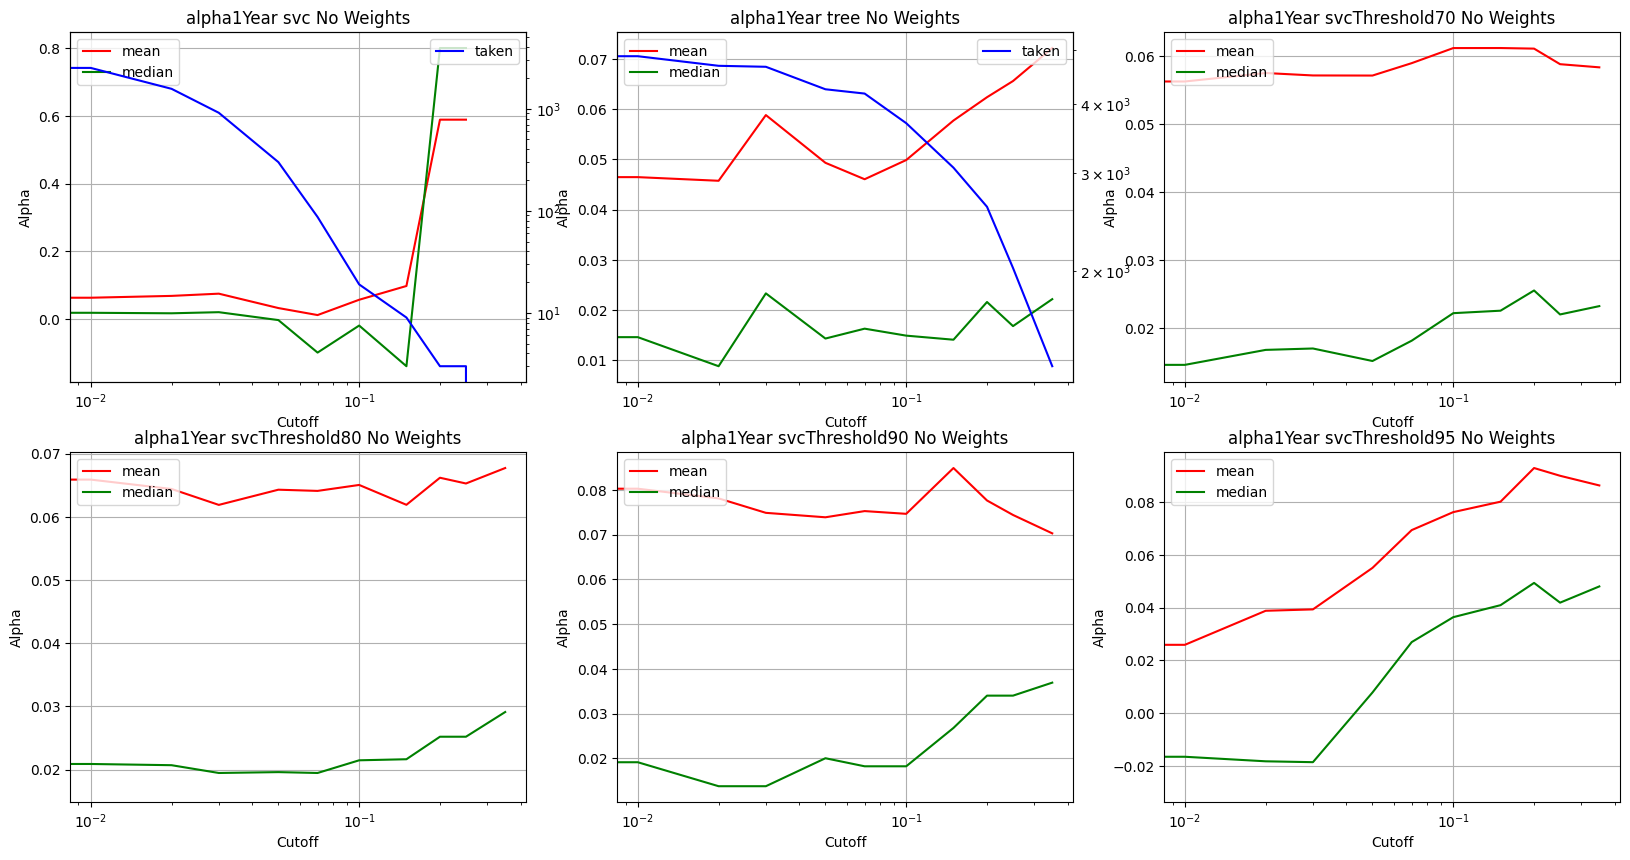

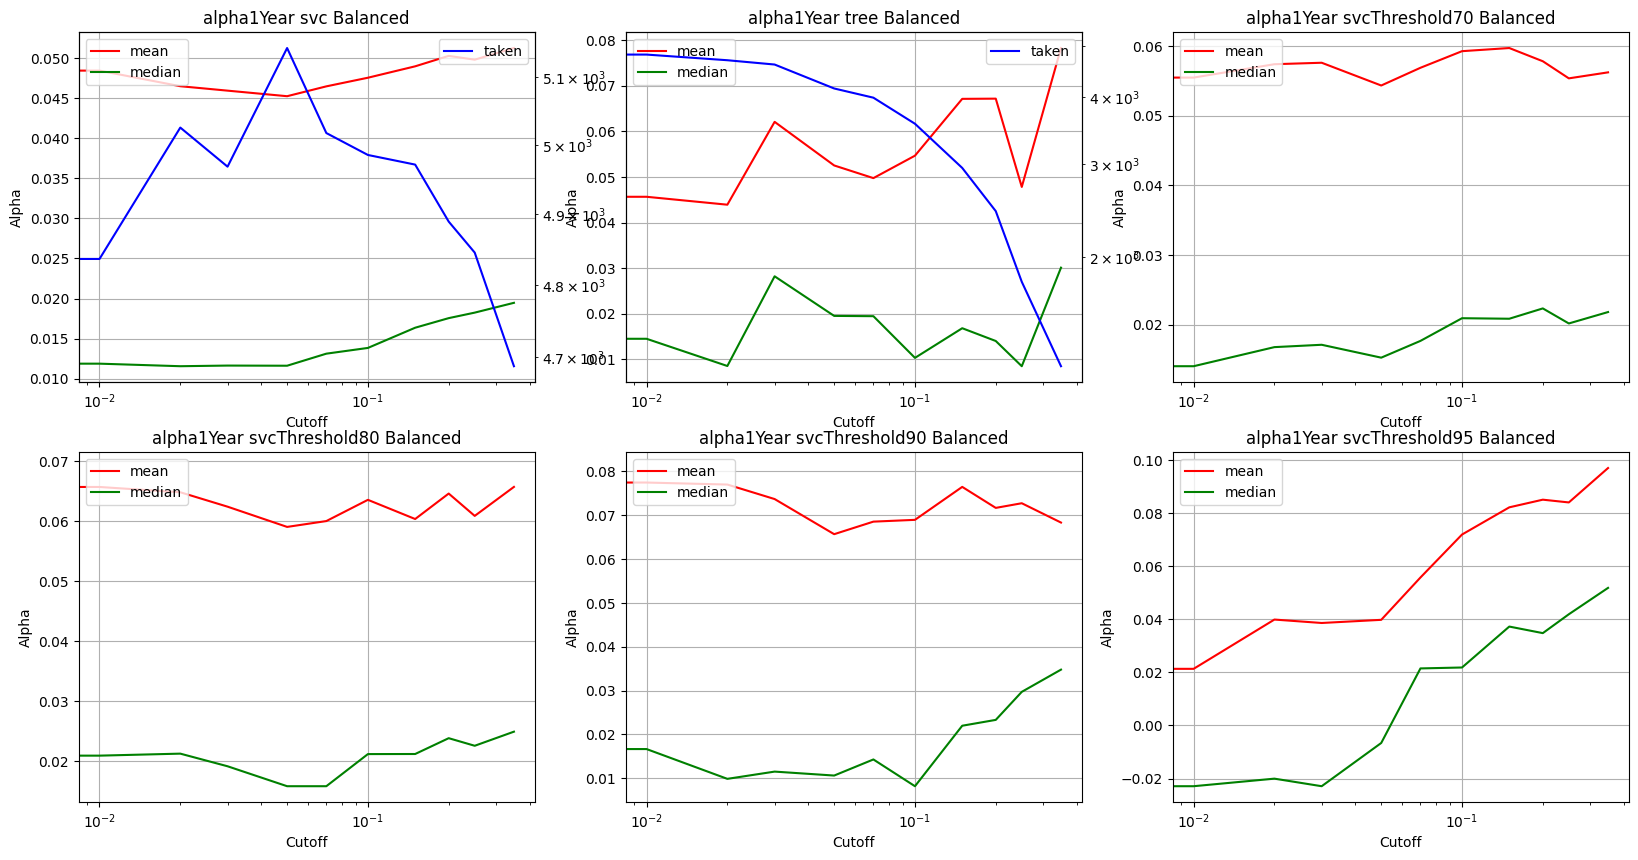

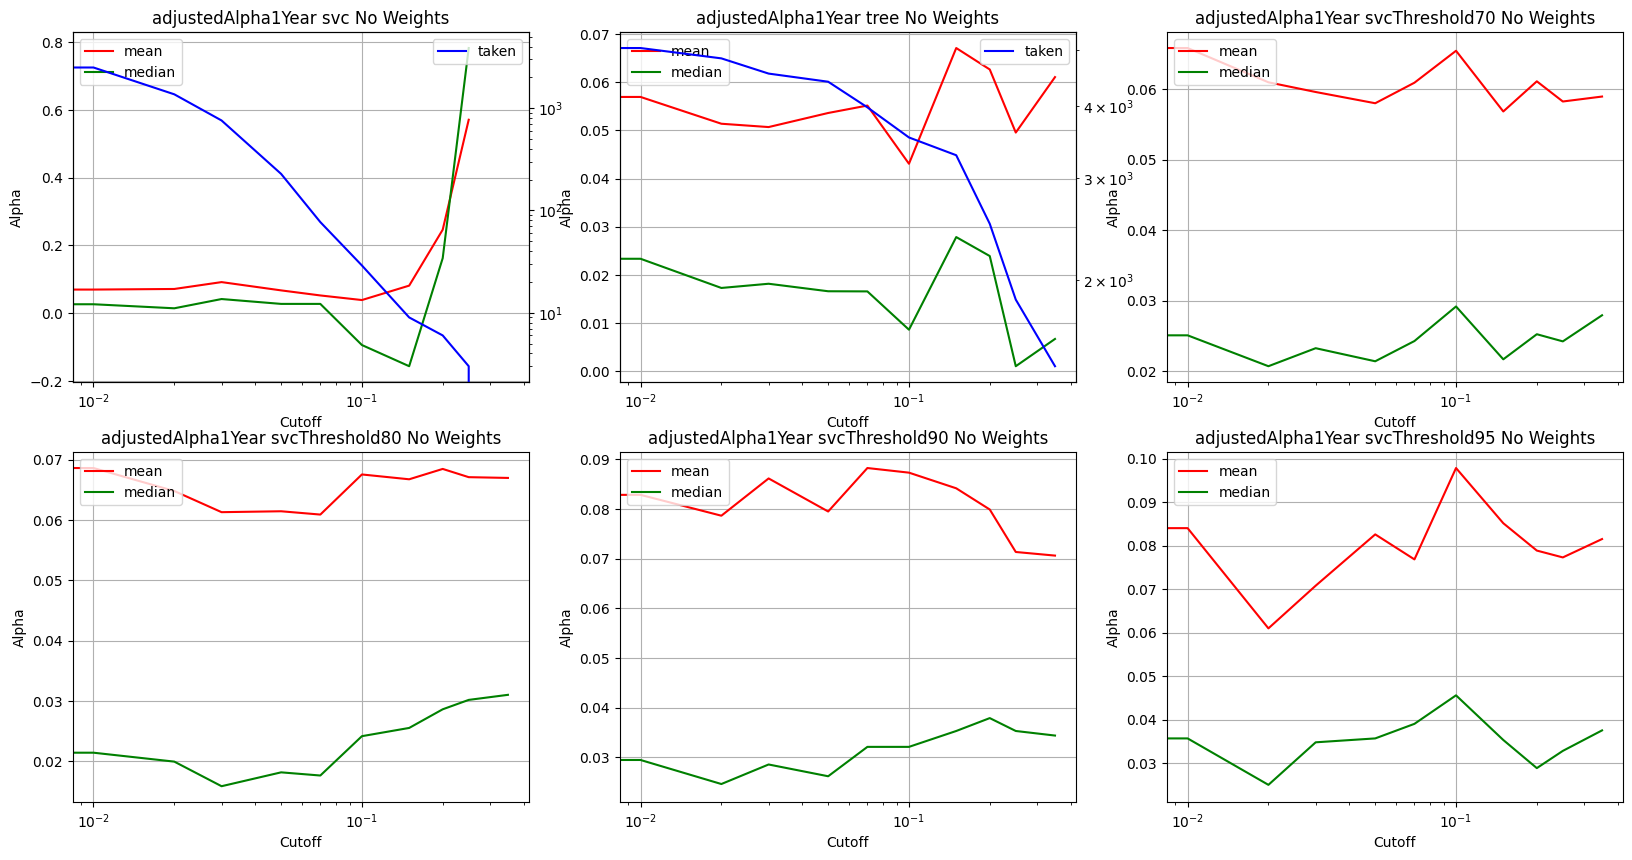

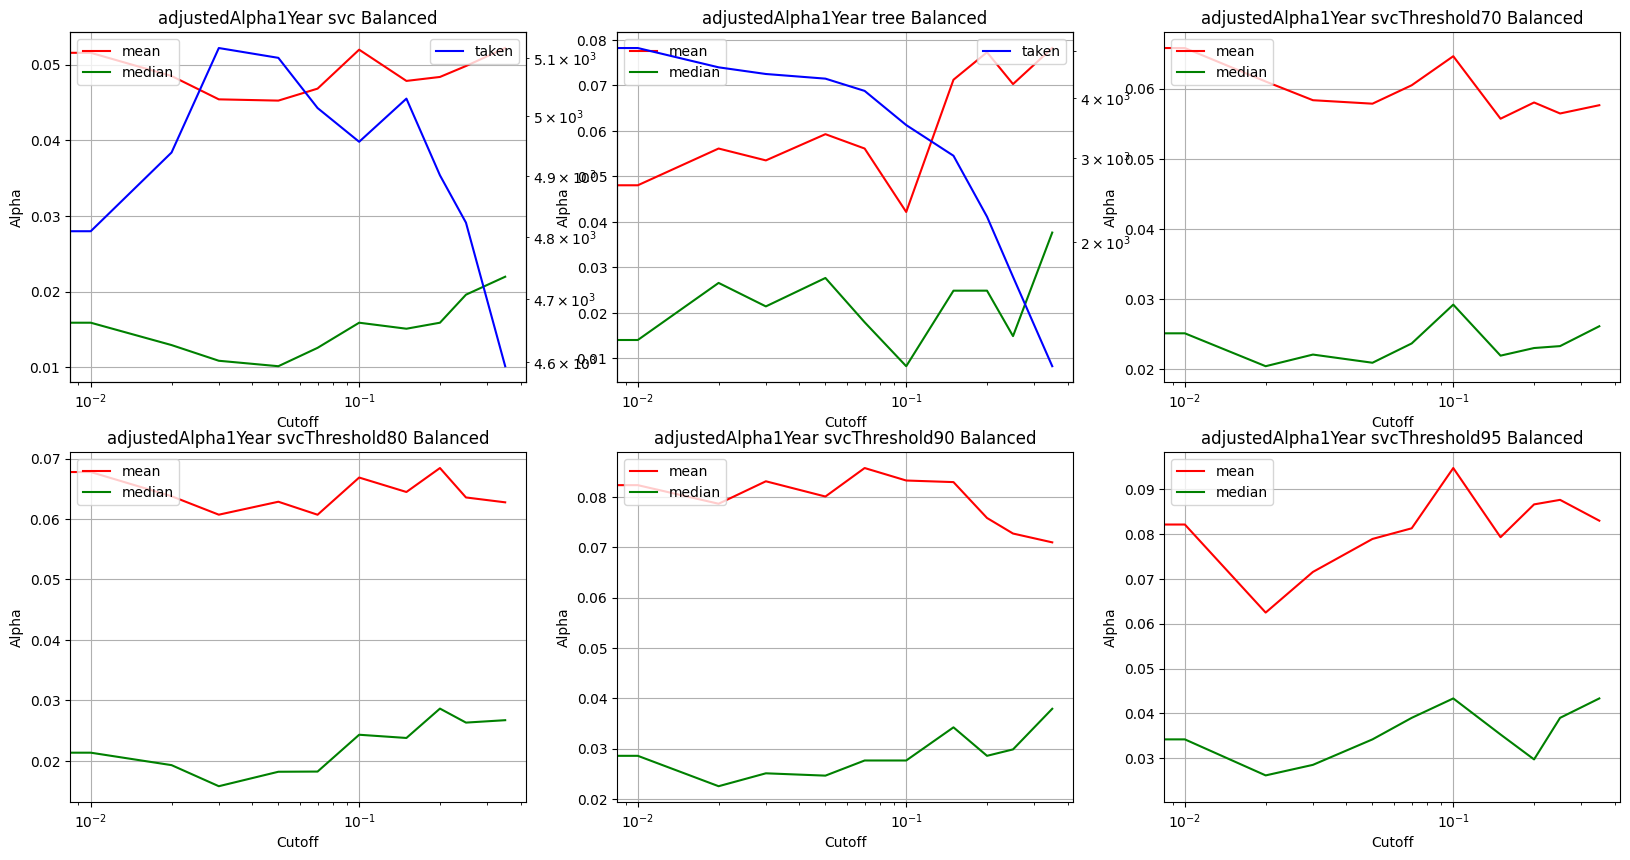

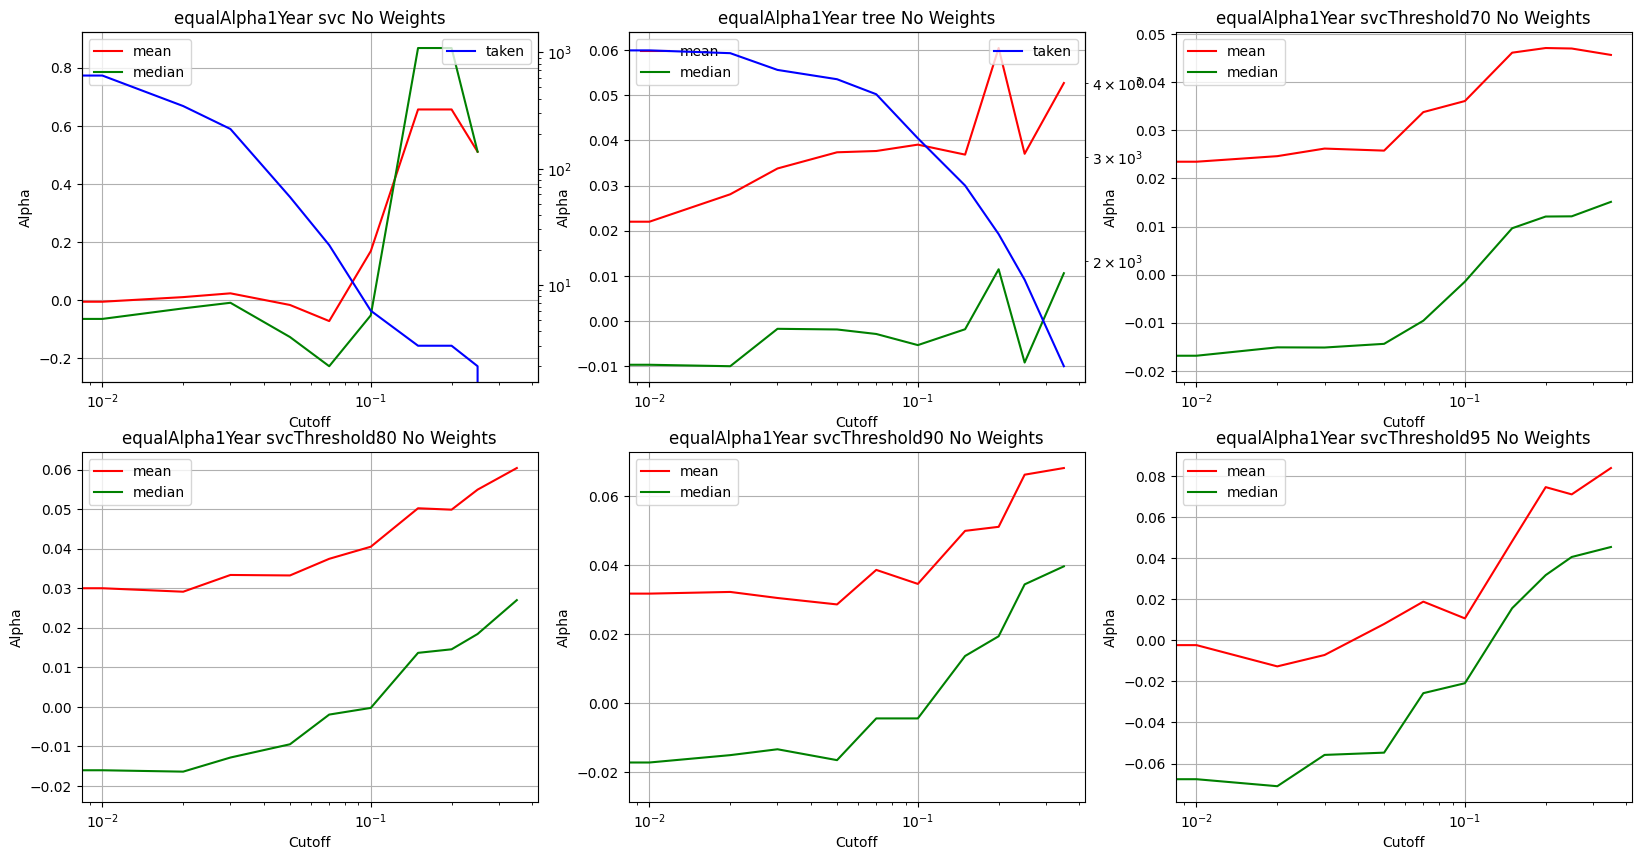

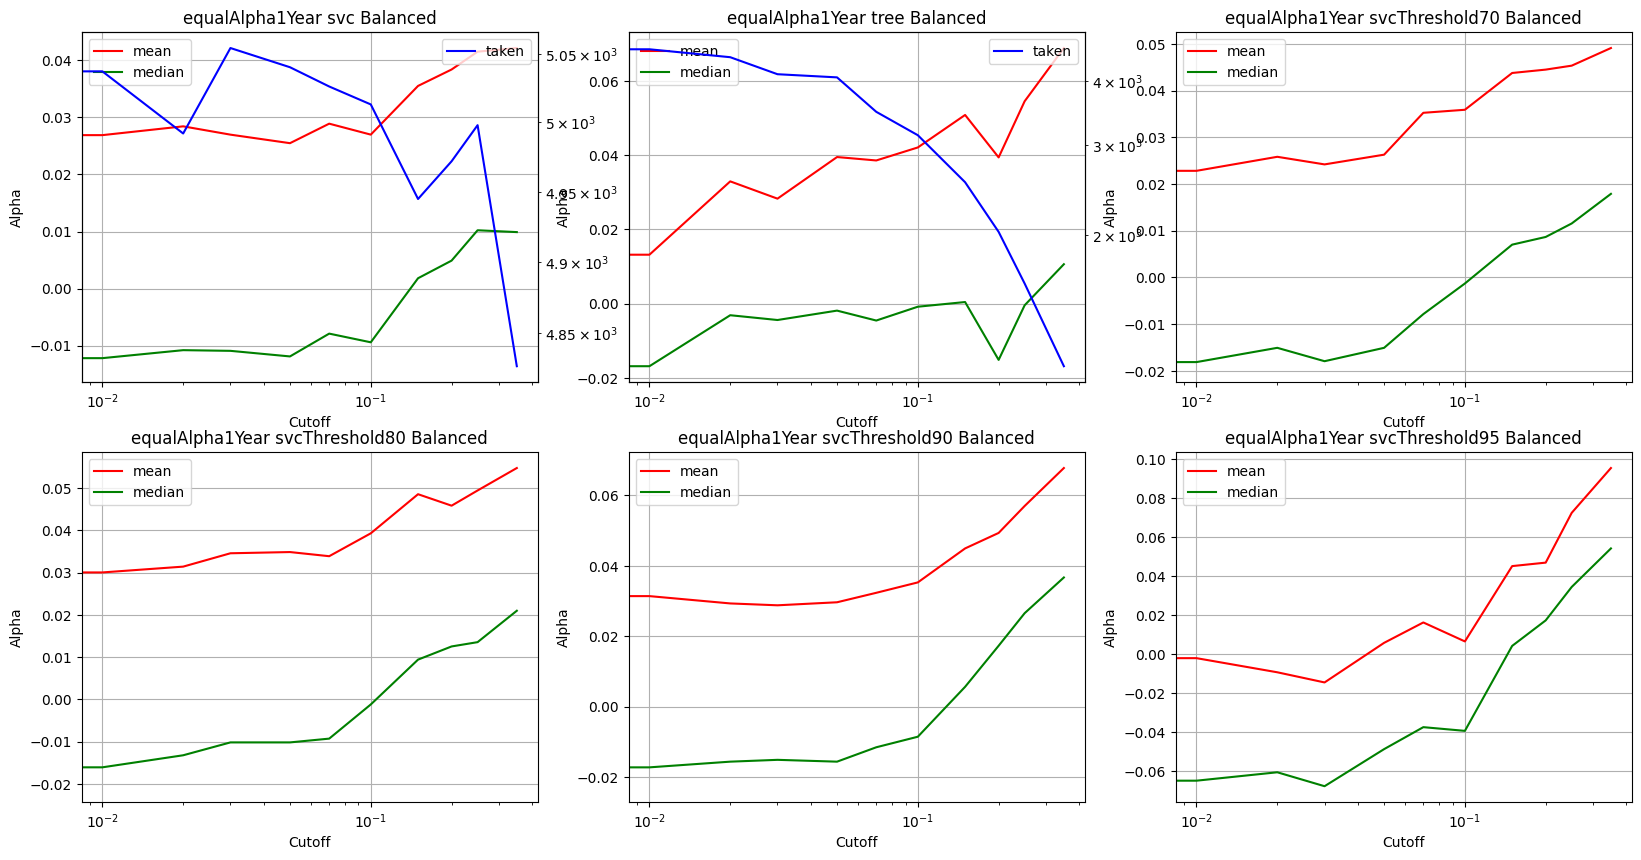

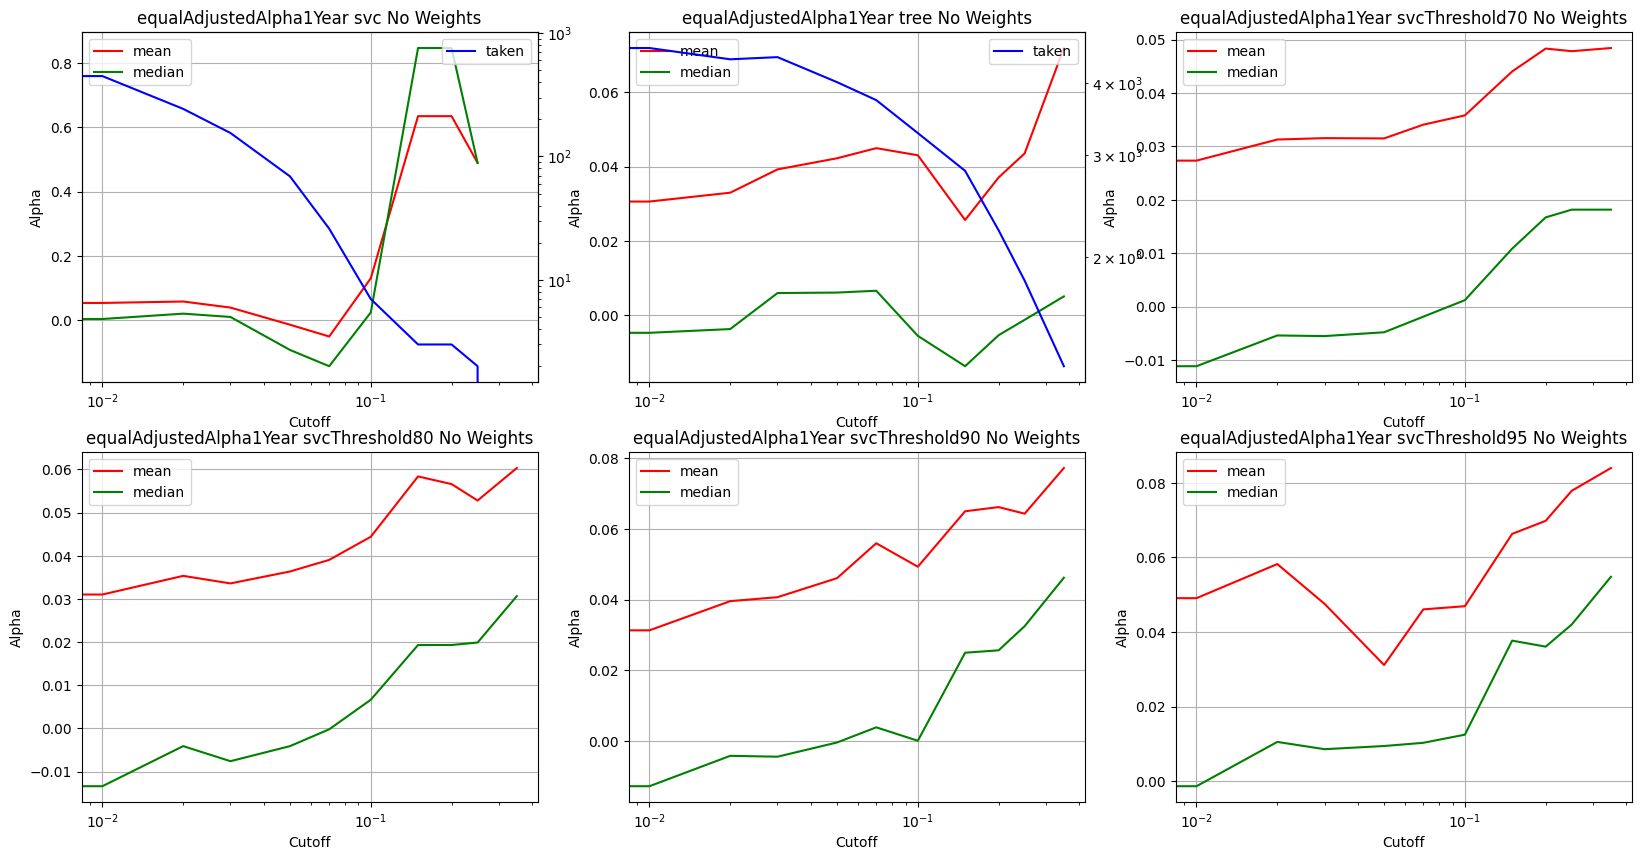

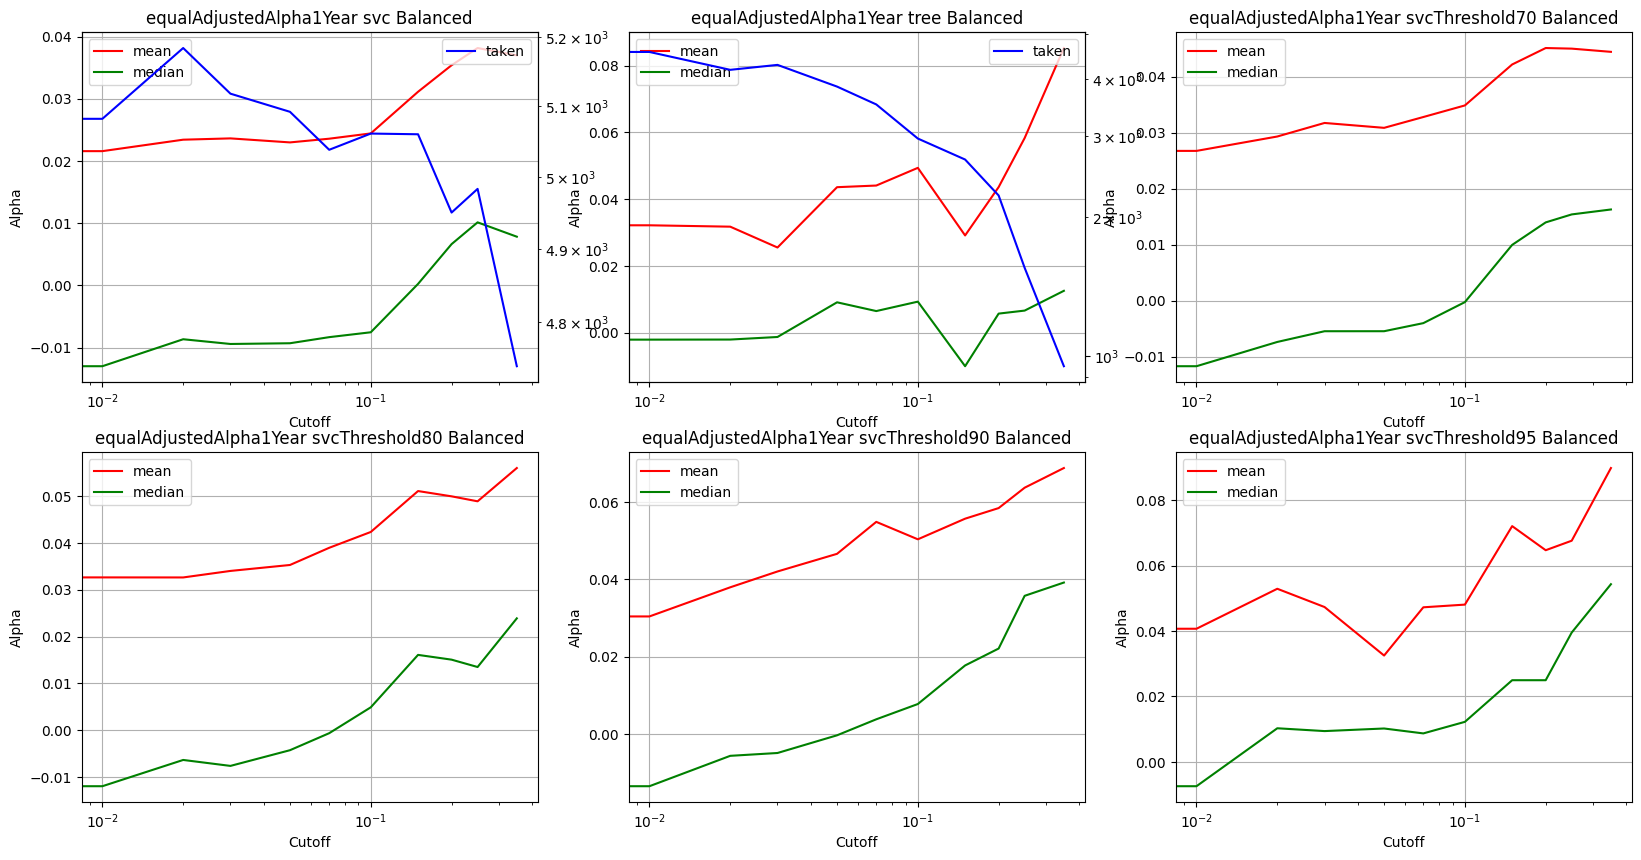

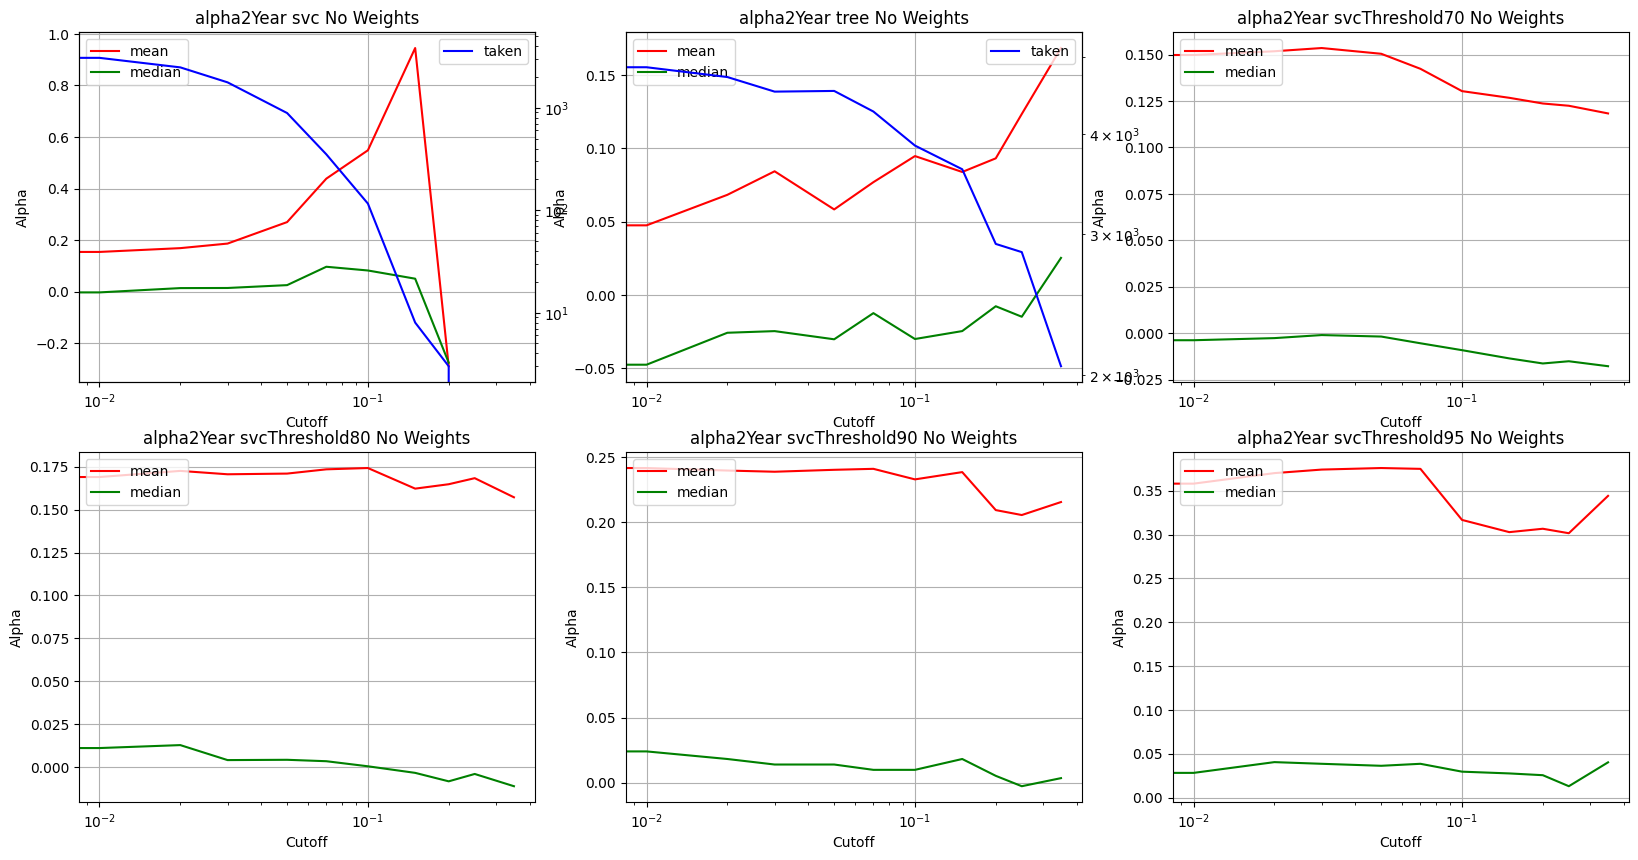

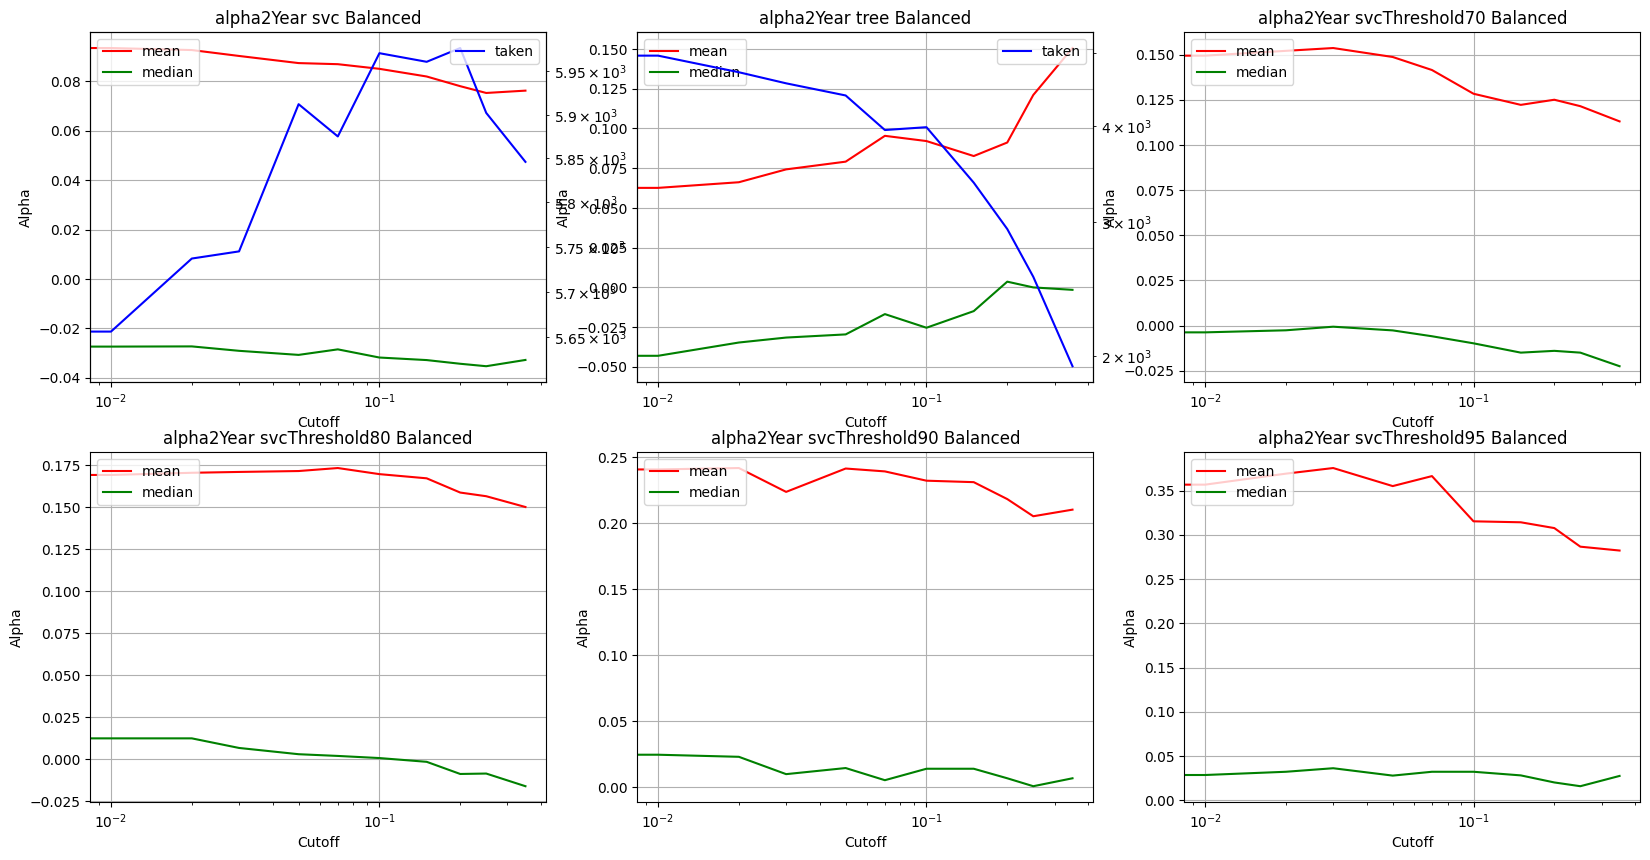

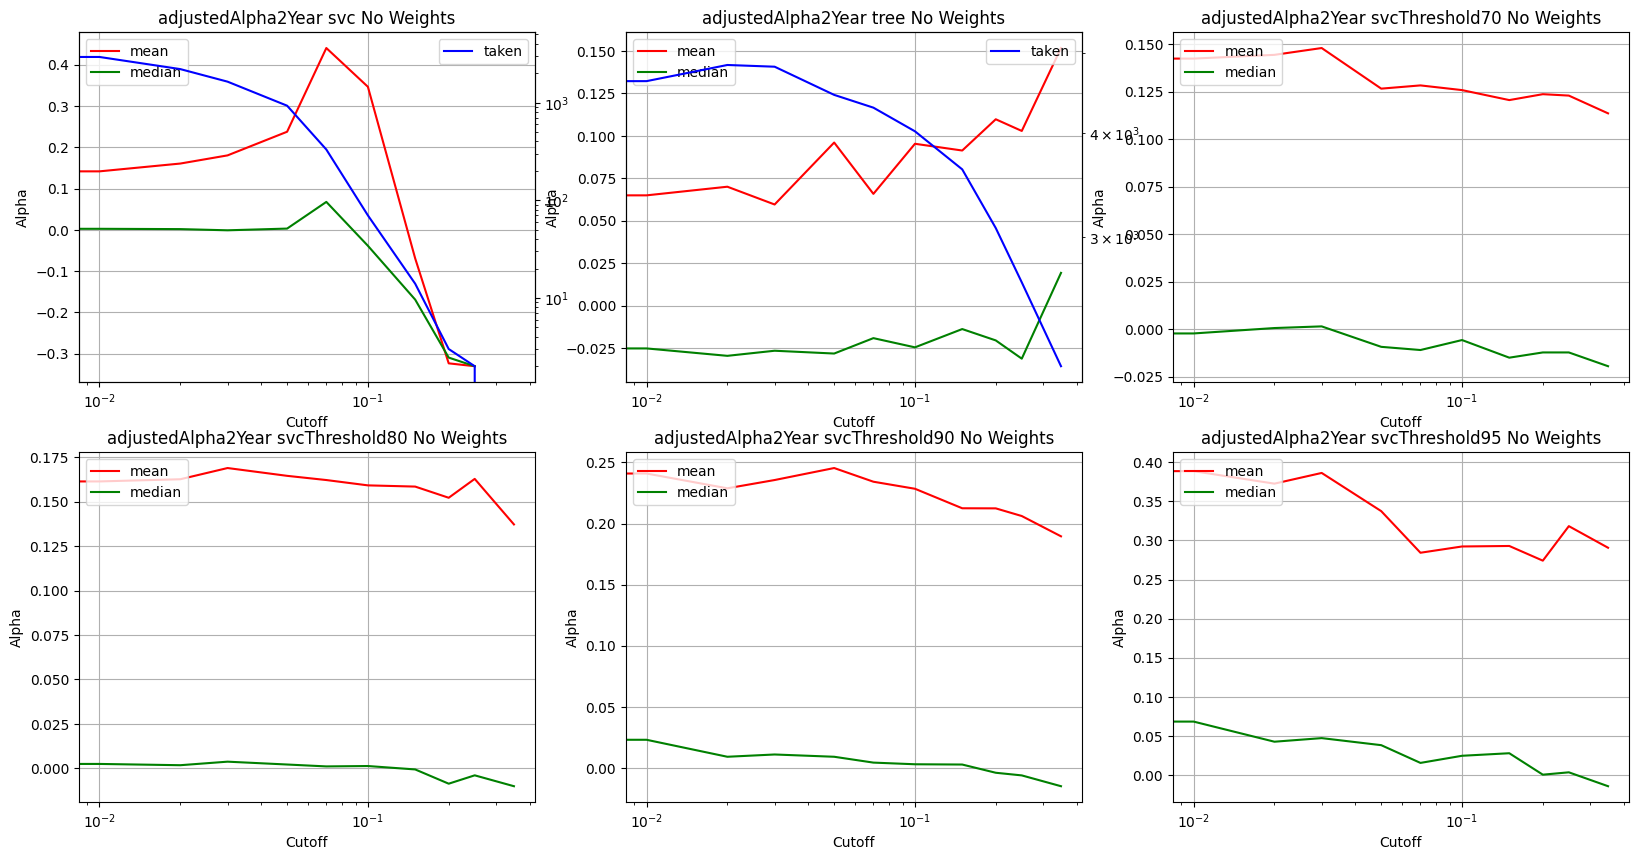

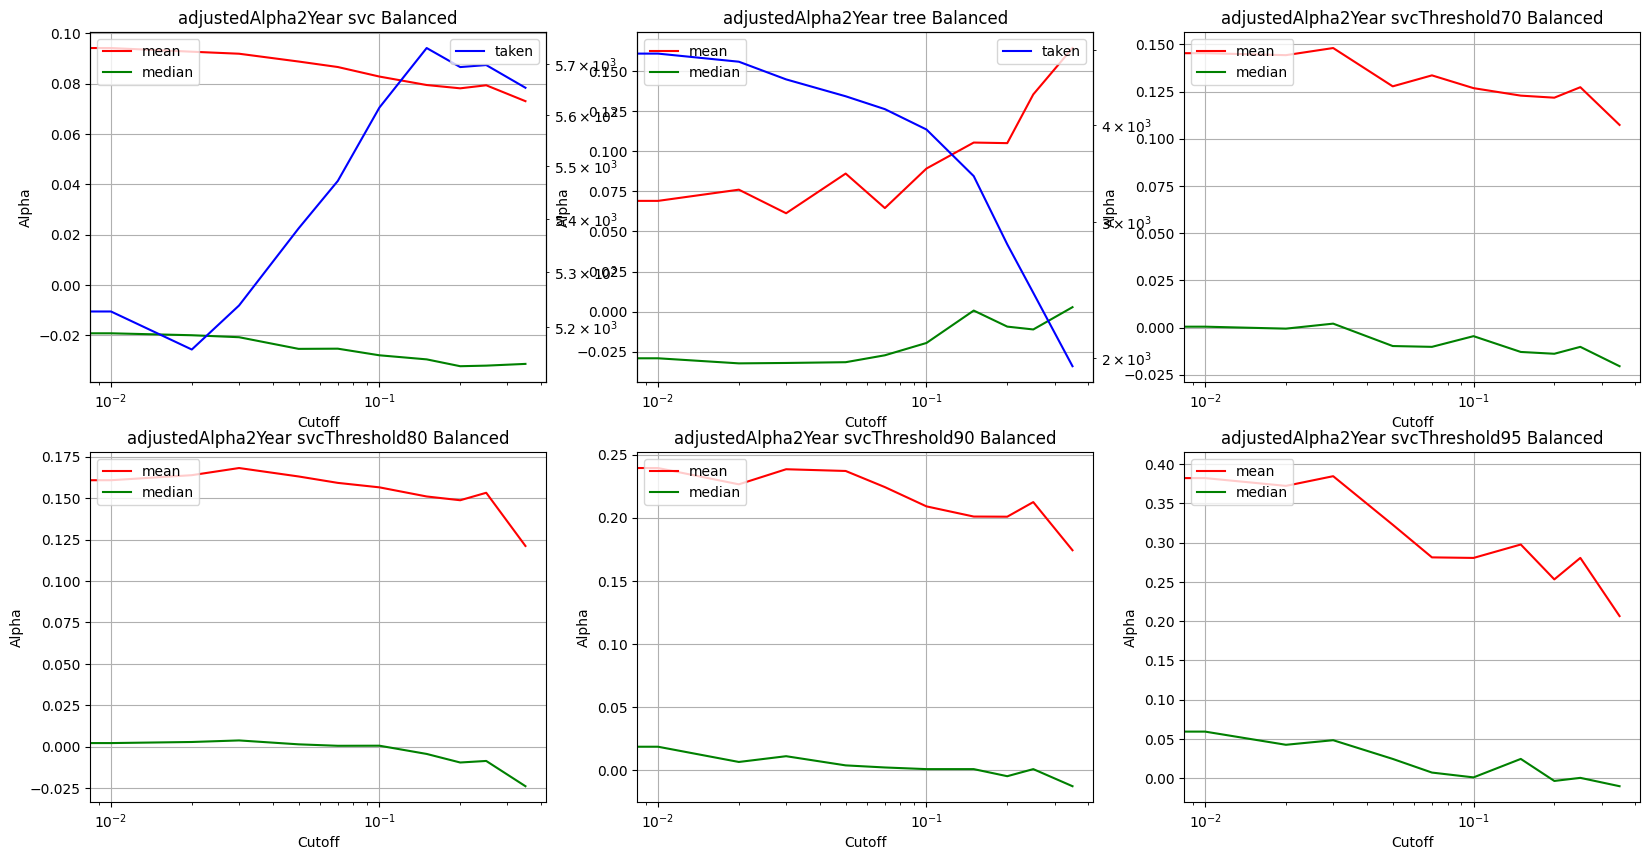

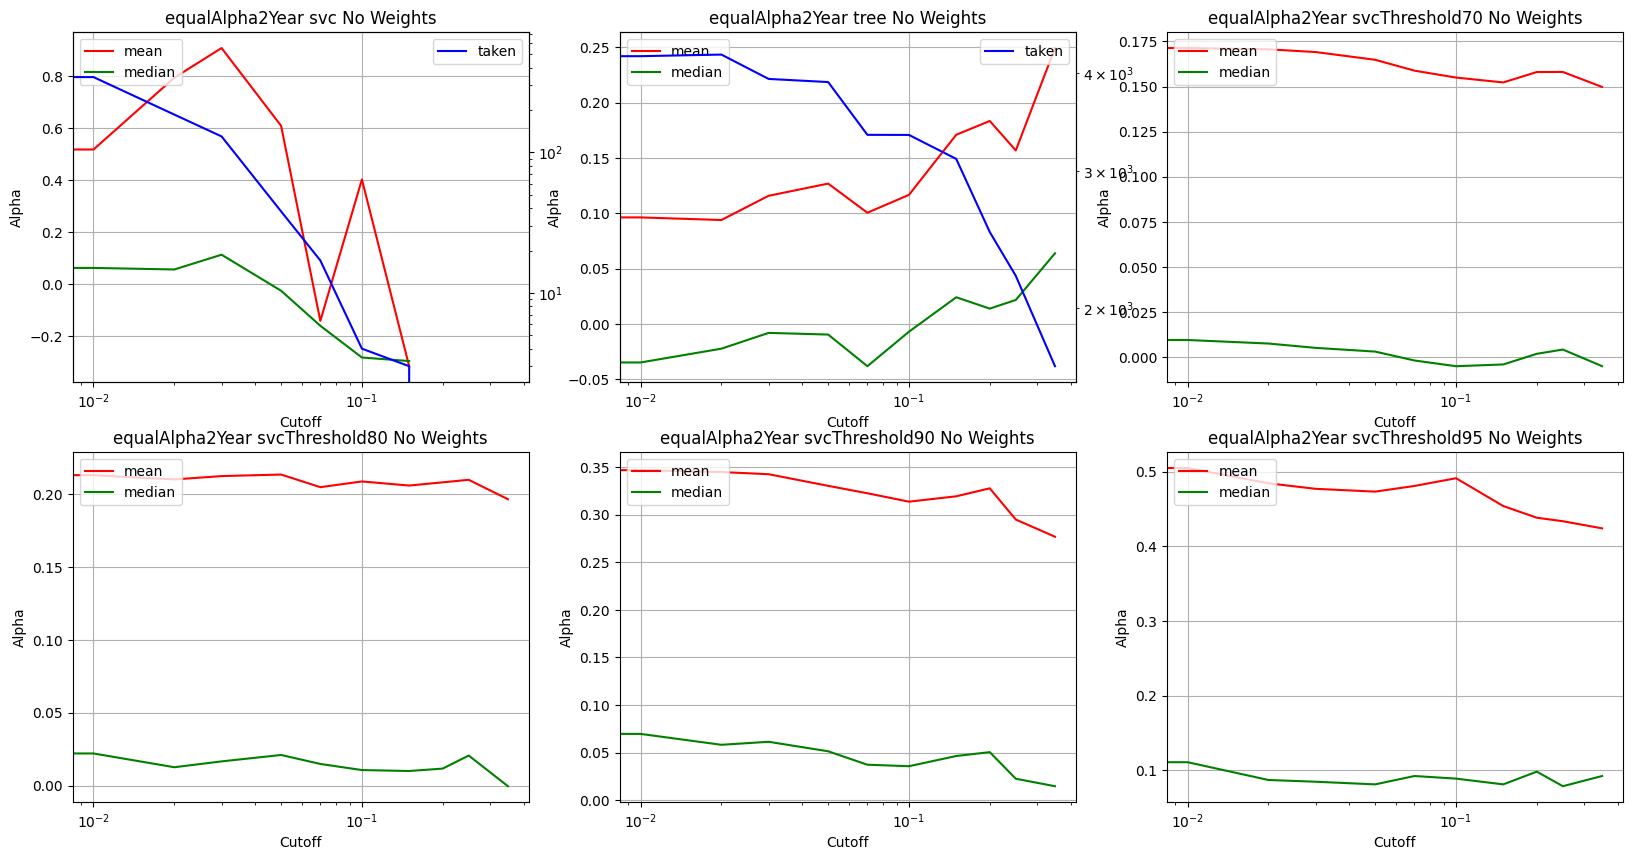

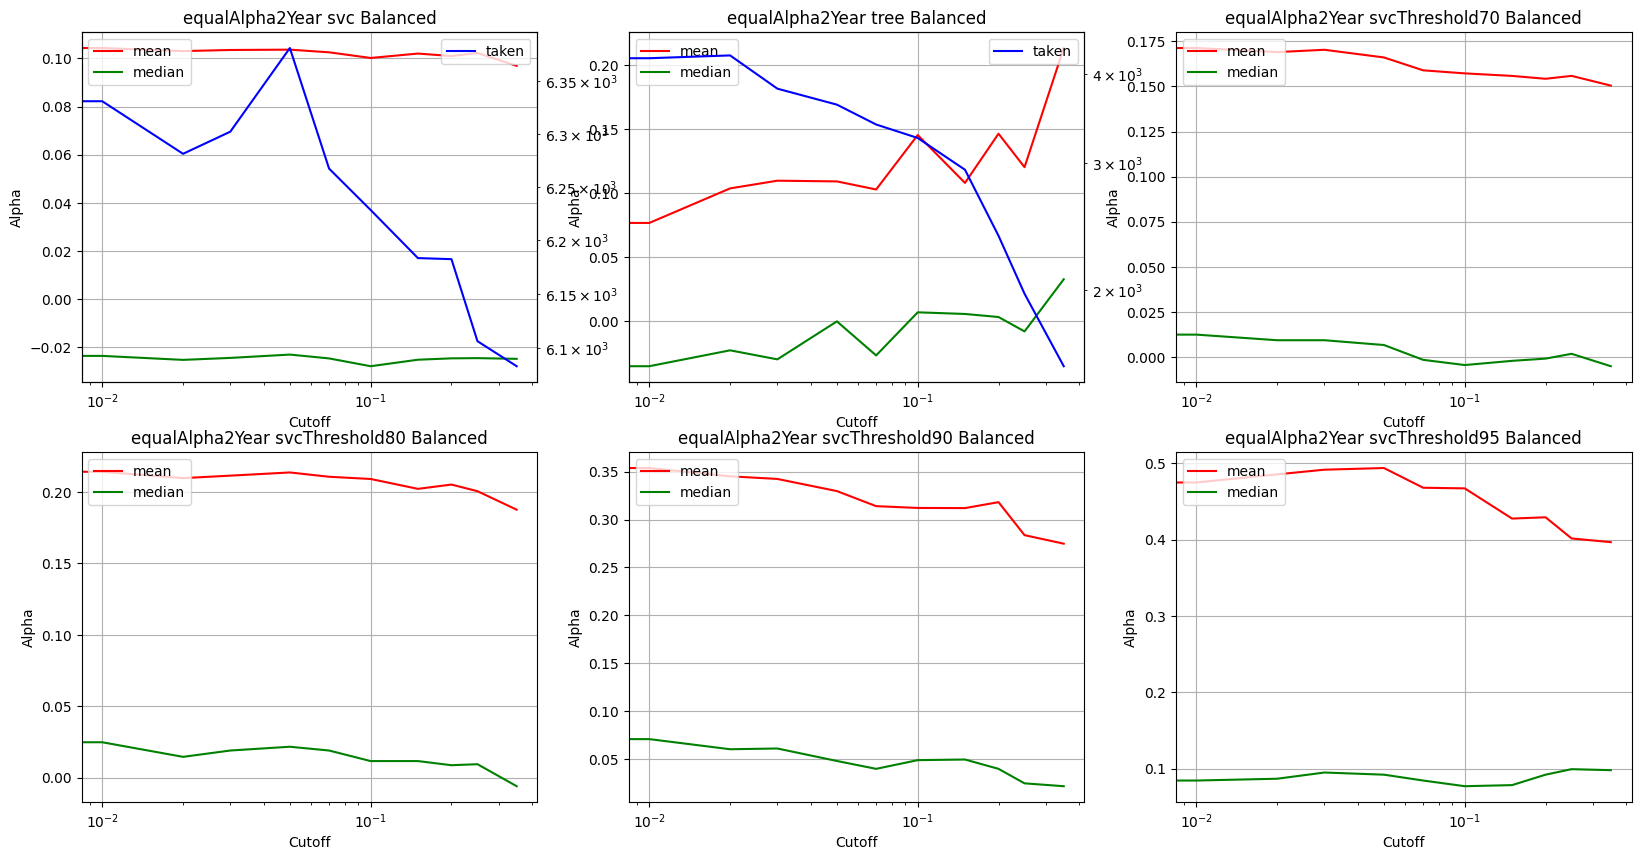

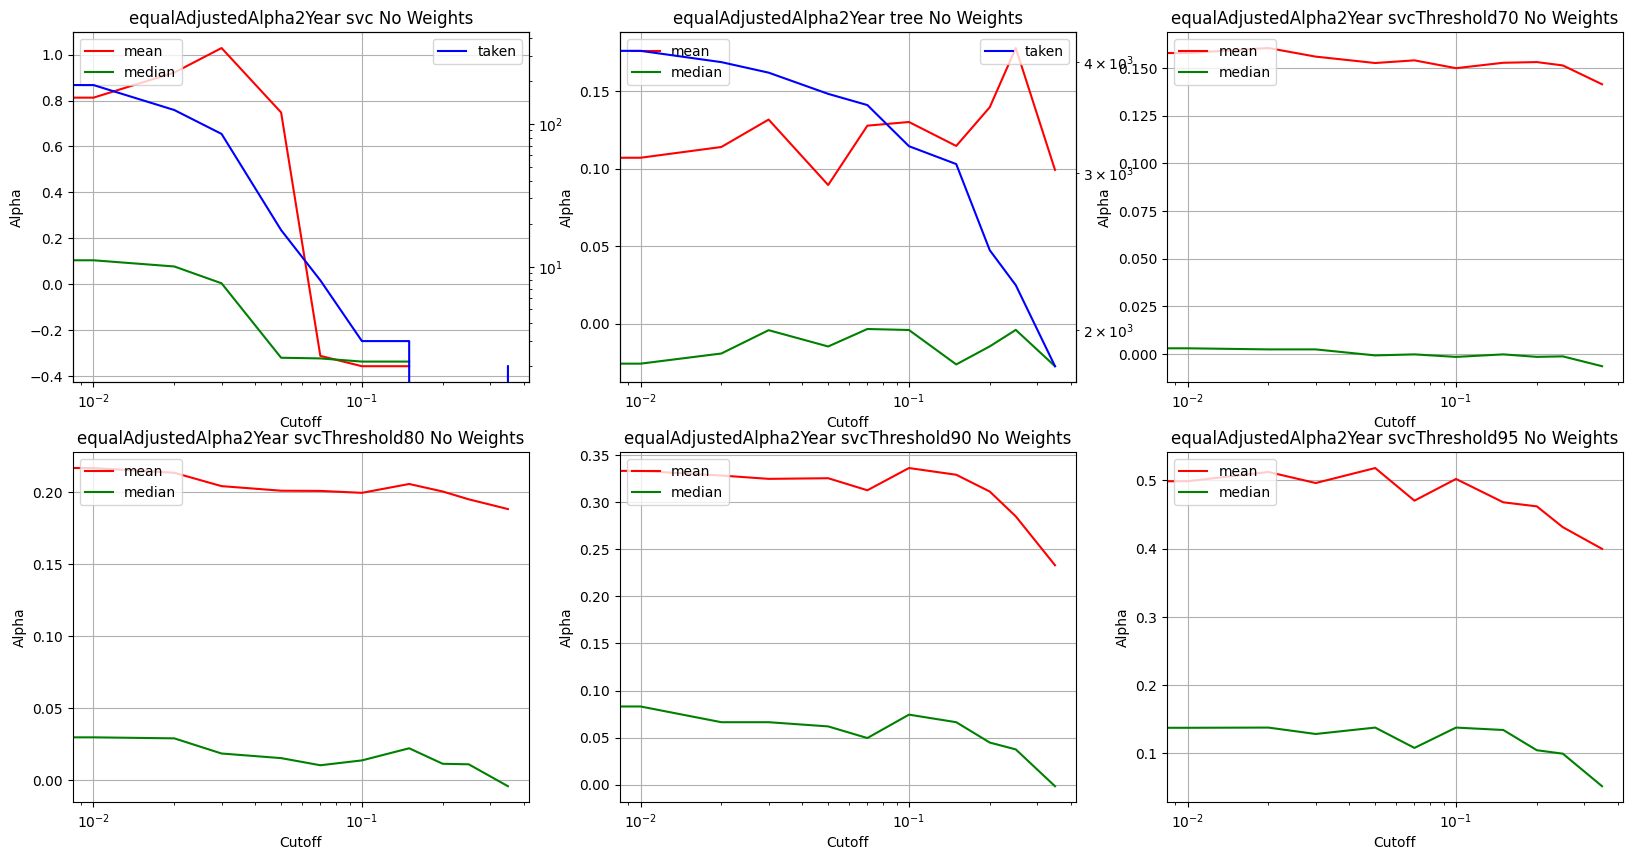

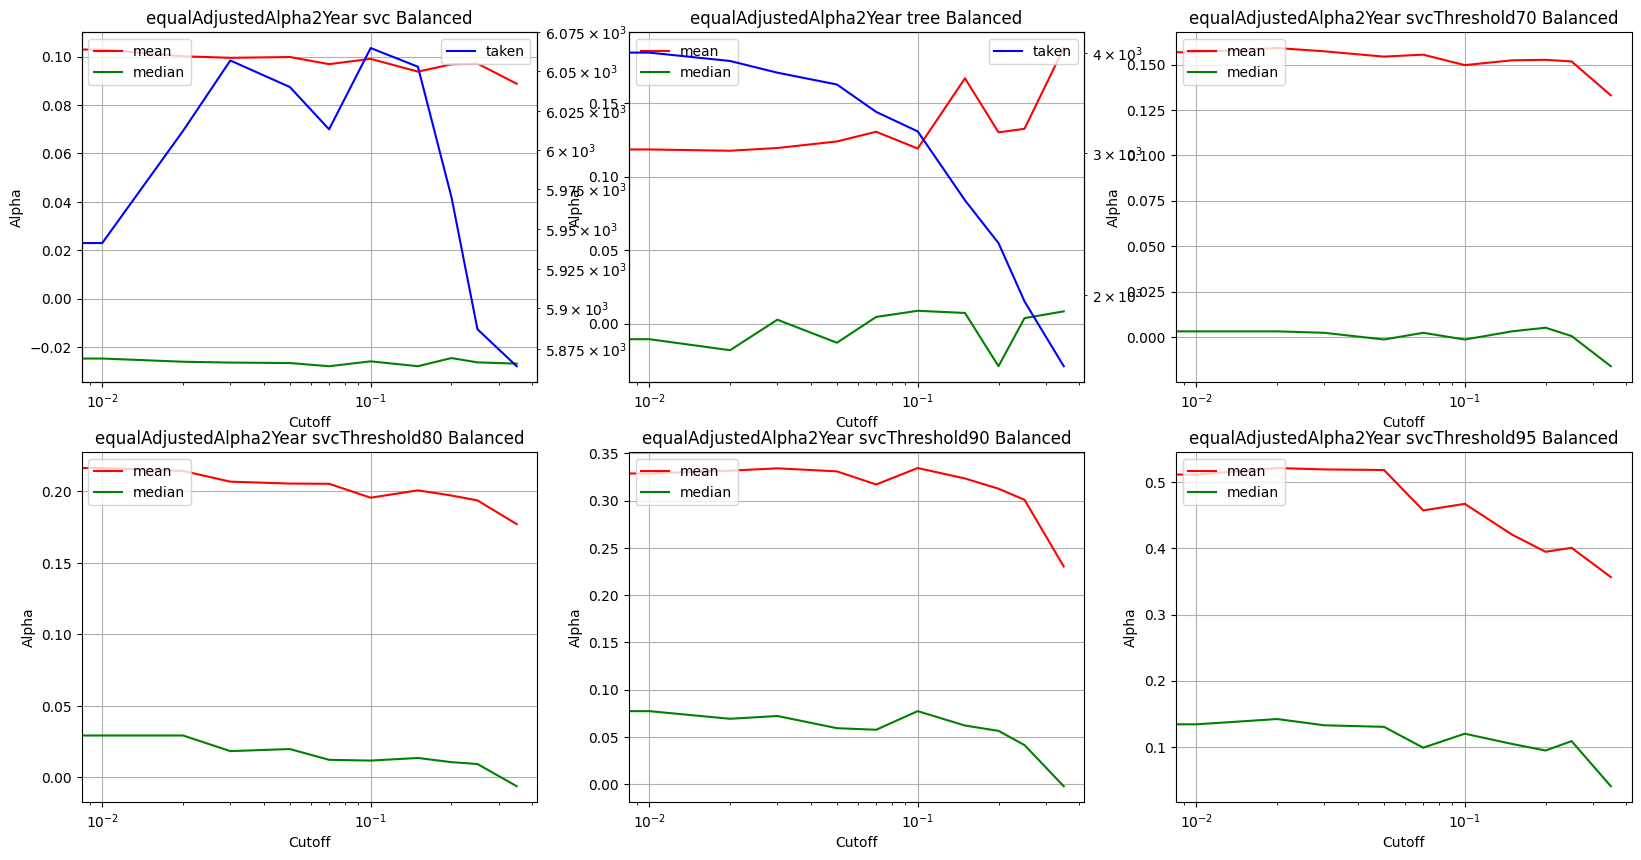

In [15]:
for yLabel in resultsToPlotYear.keys():
    thresholdKeys = [f'svcThreshold{threshold}' for threshold in thresholds]
    toPlot = resultsToPlotYear[yLabel]

    drawFrom1results(resultsToPlotYear[yLabel], yLabel, cutoffs, title='No Weights', keys=['svc', 'tree', *thresholdKeys])
    plt.show()

    drawFrom1results(balancedResultsYear[yLabel], yLabel, cutoffs, title='Balanced', keys=['svc', 'tree', *thresholdKeys])
    plt.show()


resultsToPlotCompany AND balancedResultsCompany

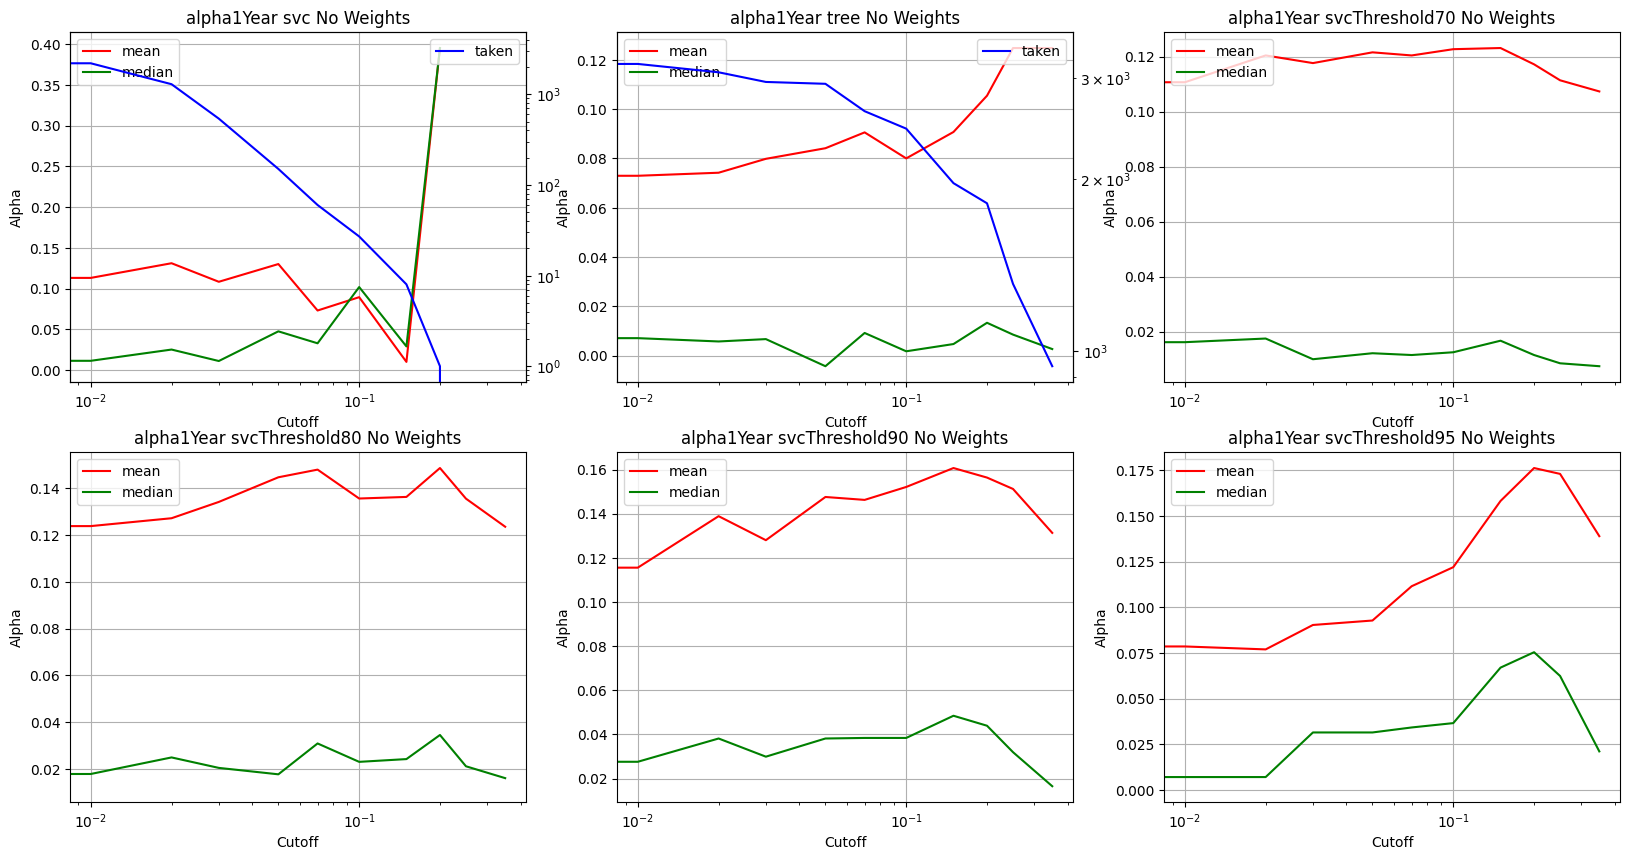

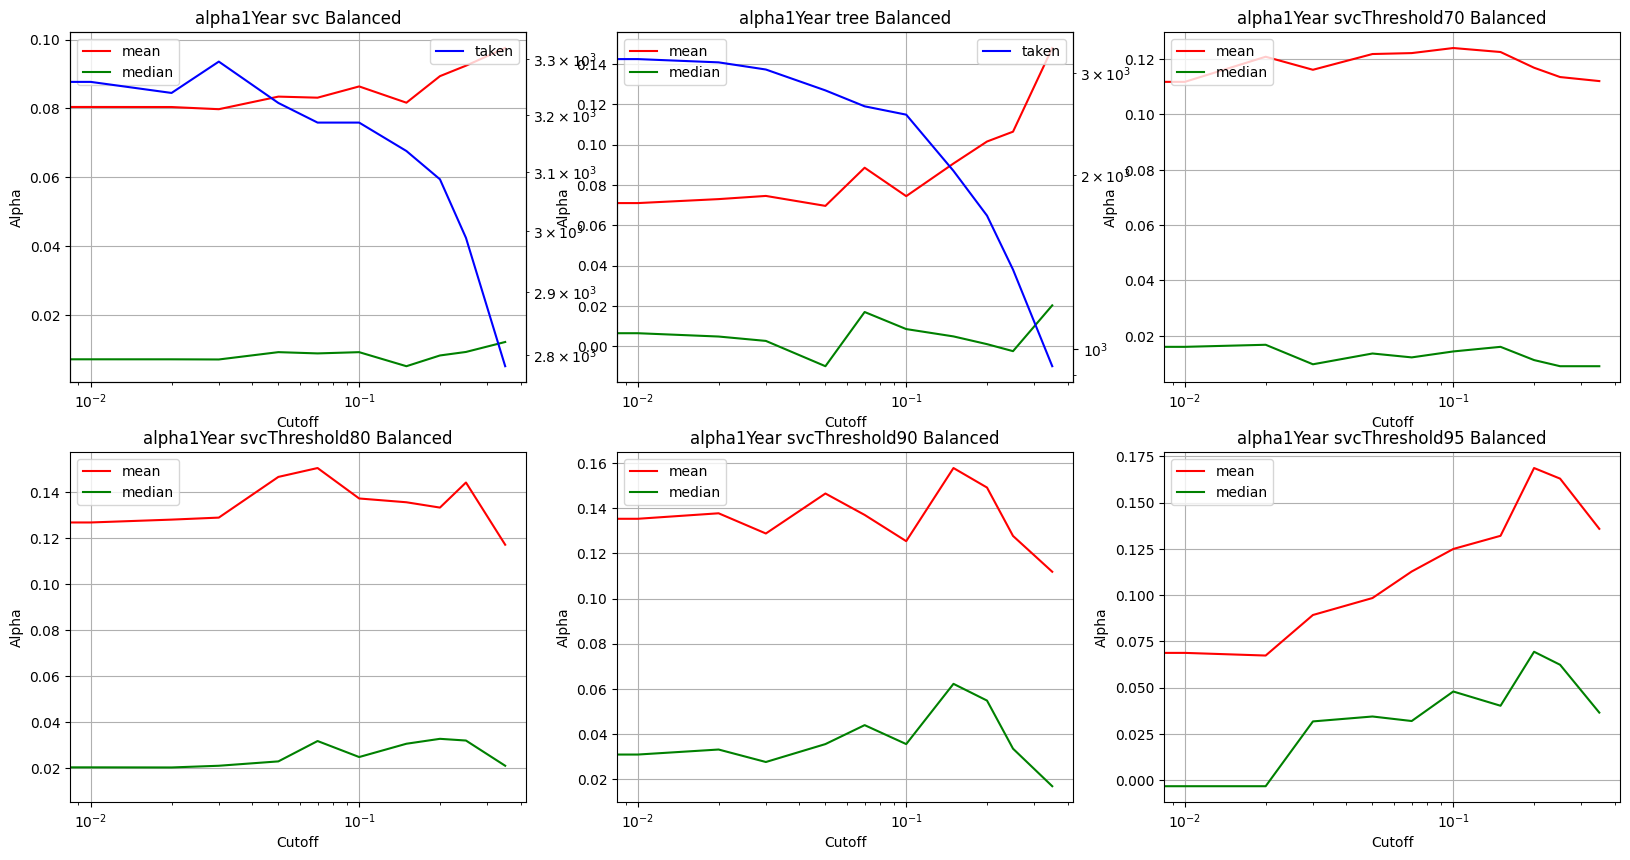

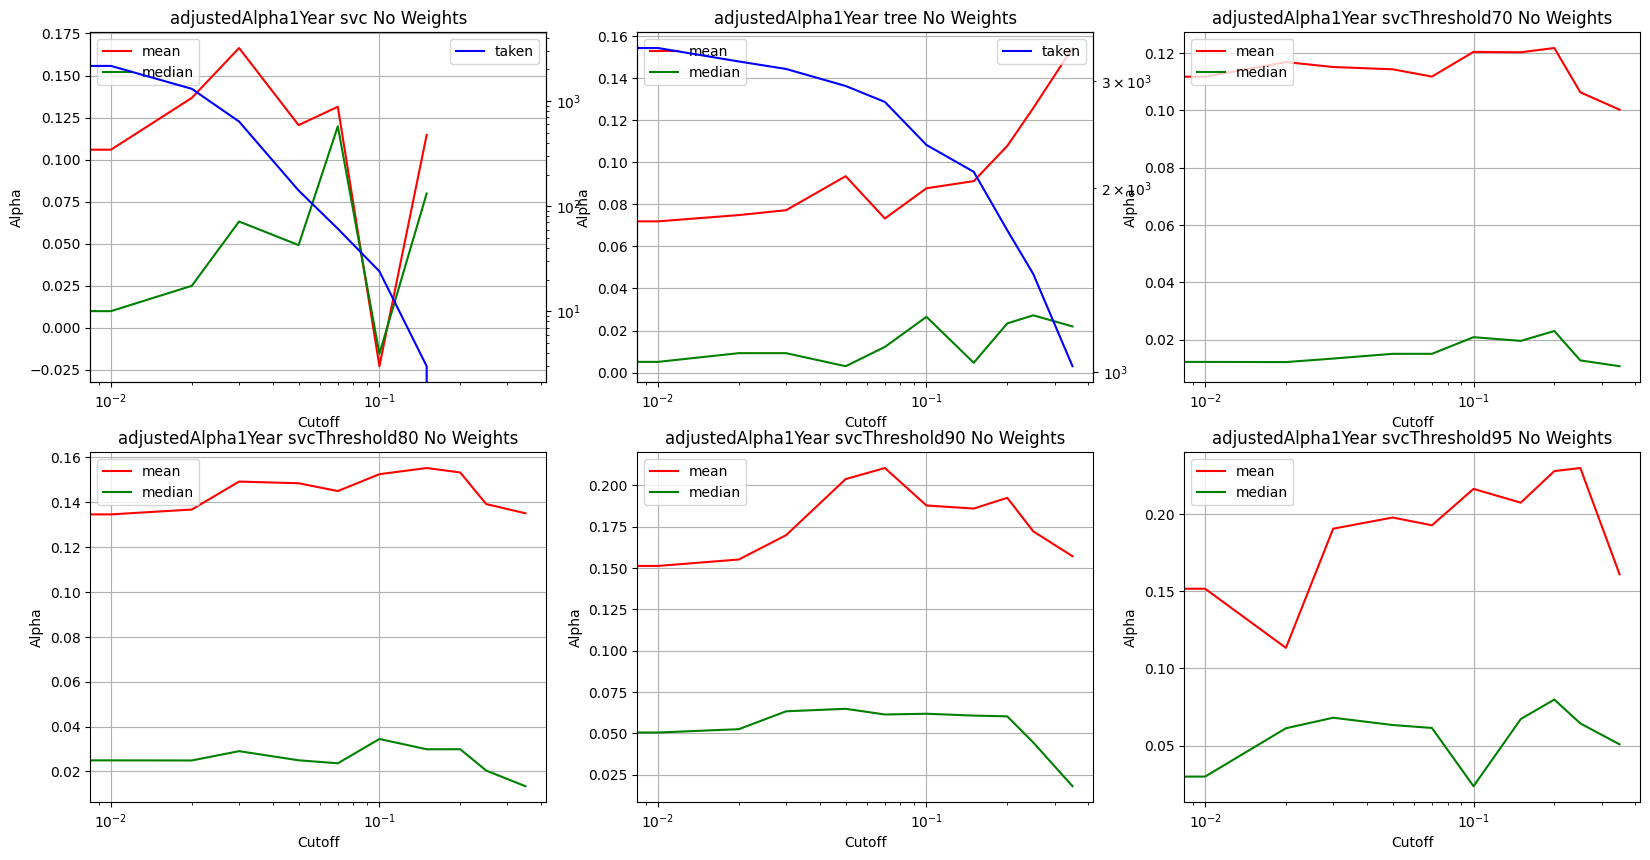

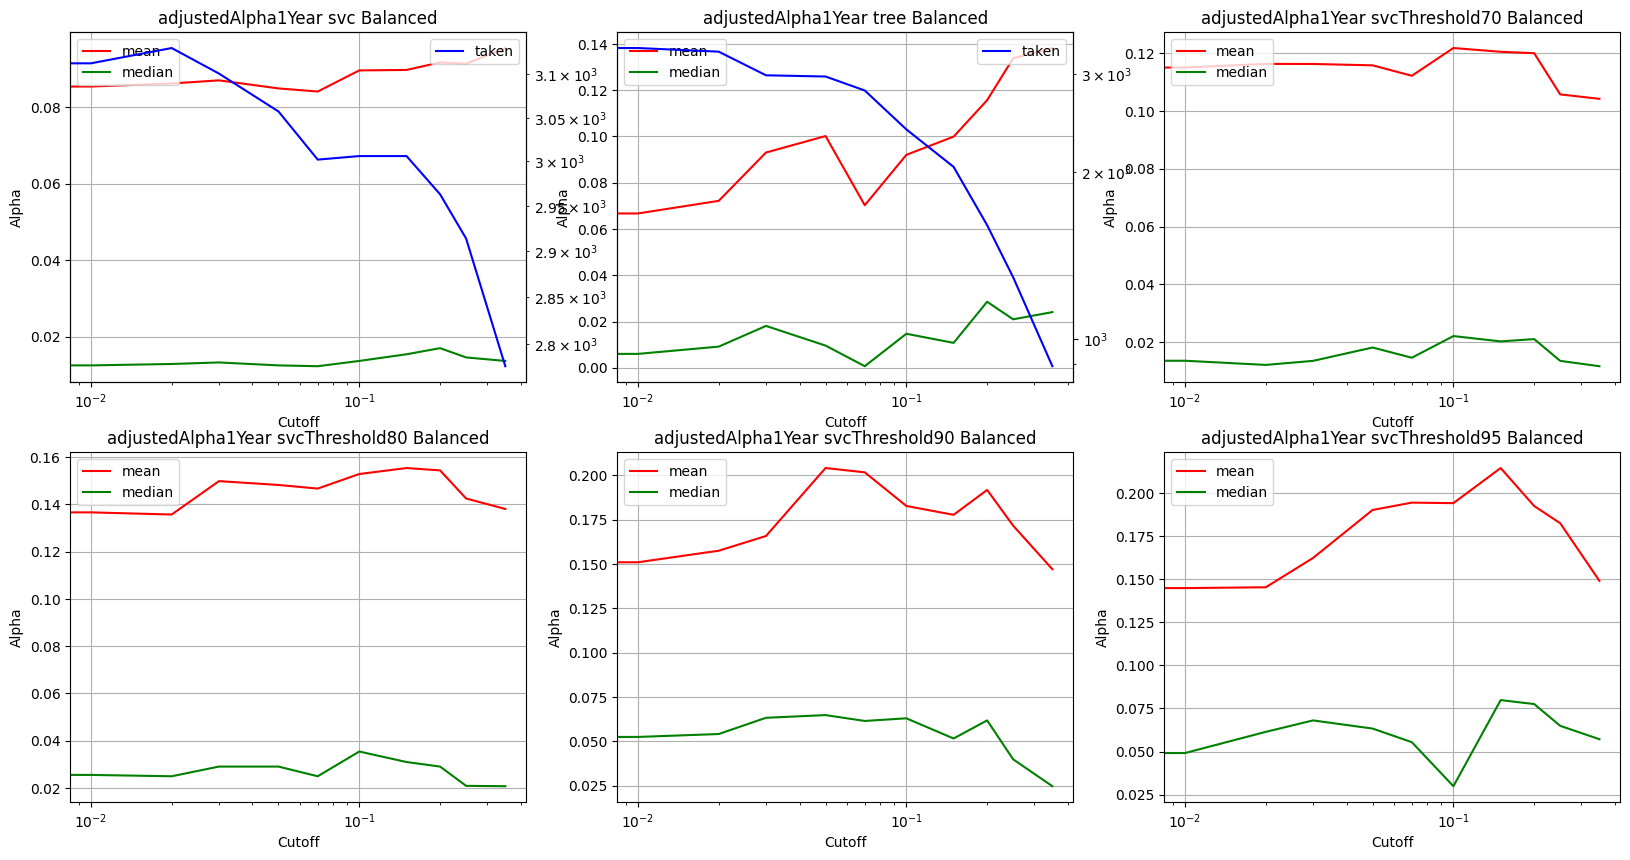

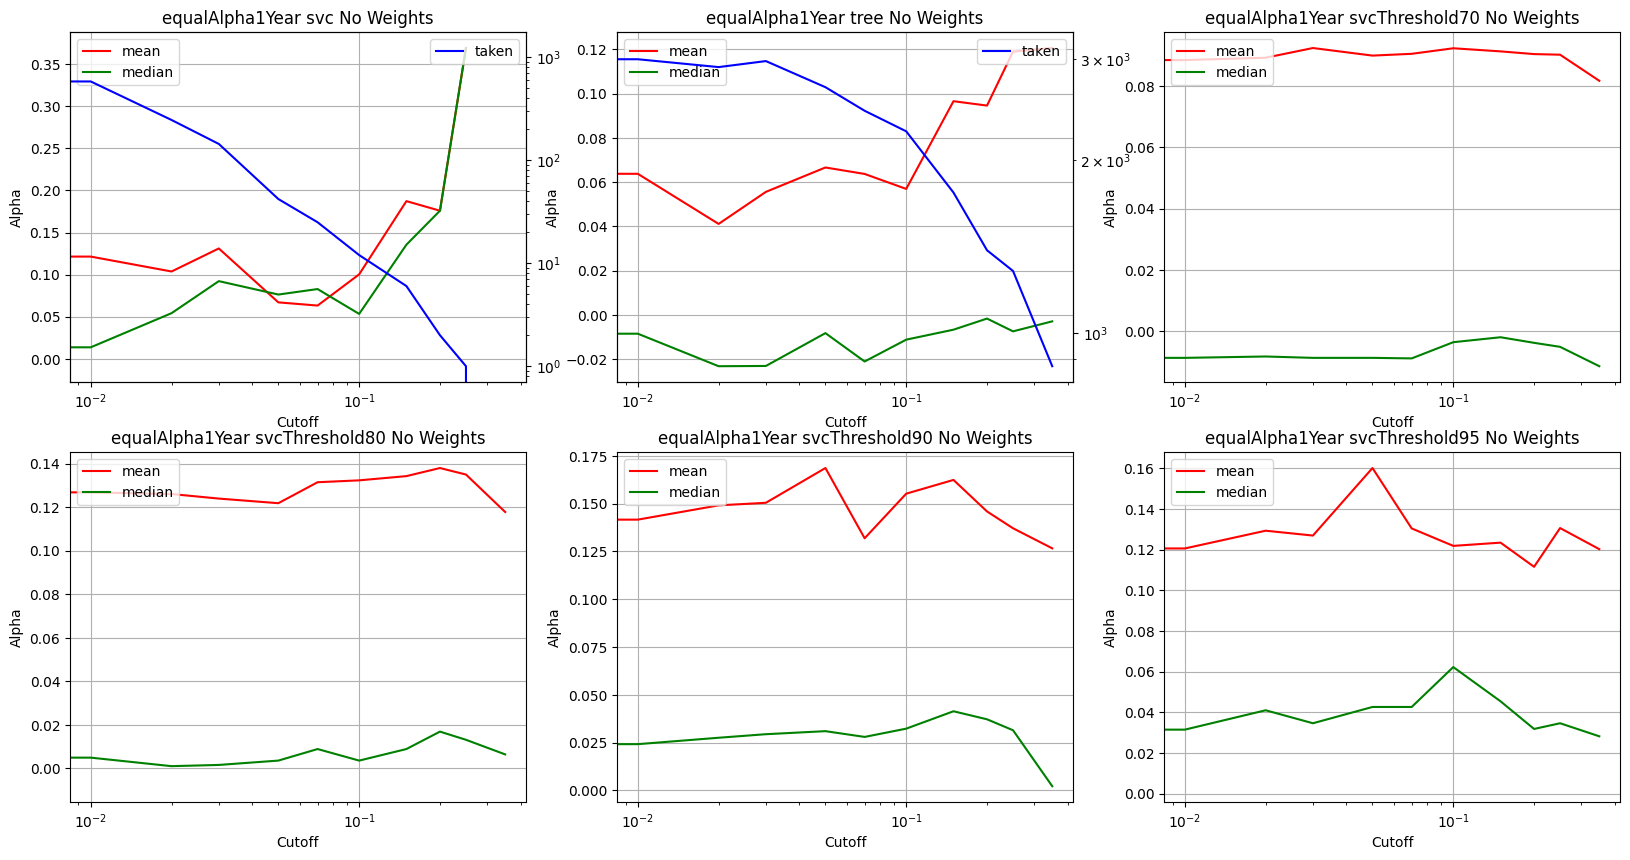

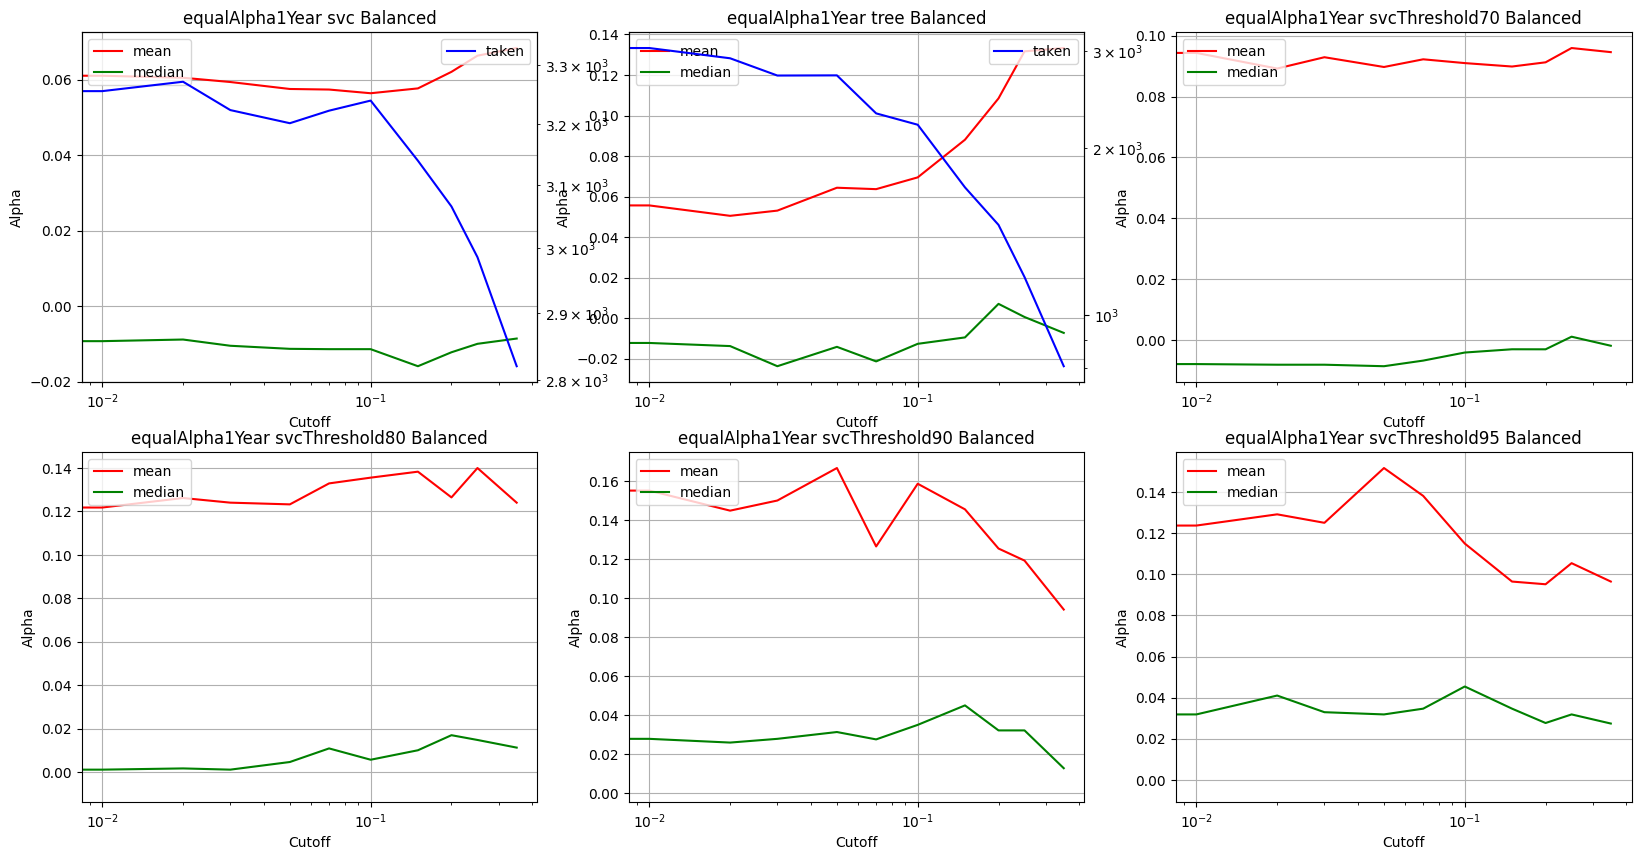

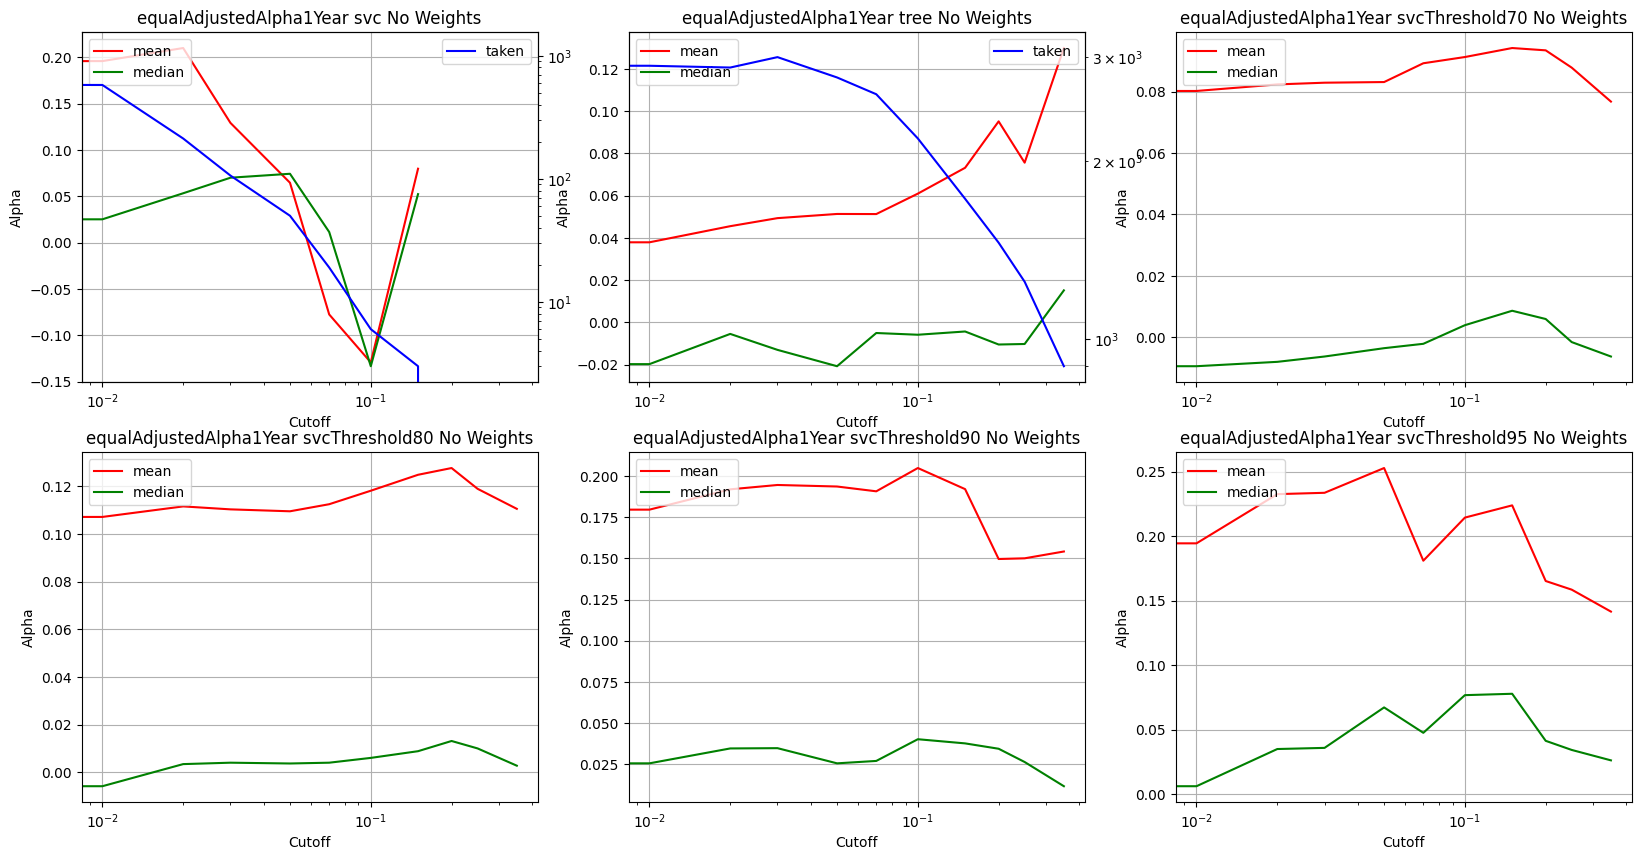

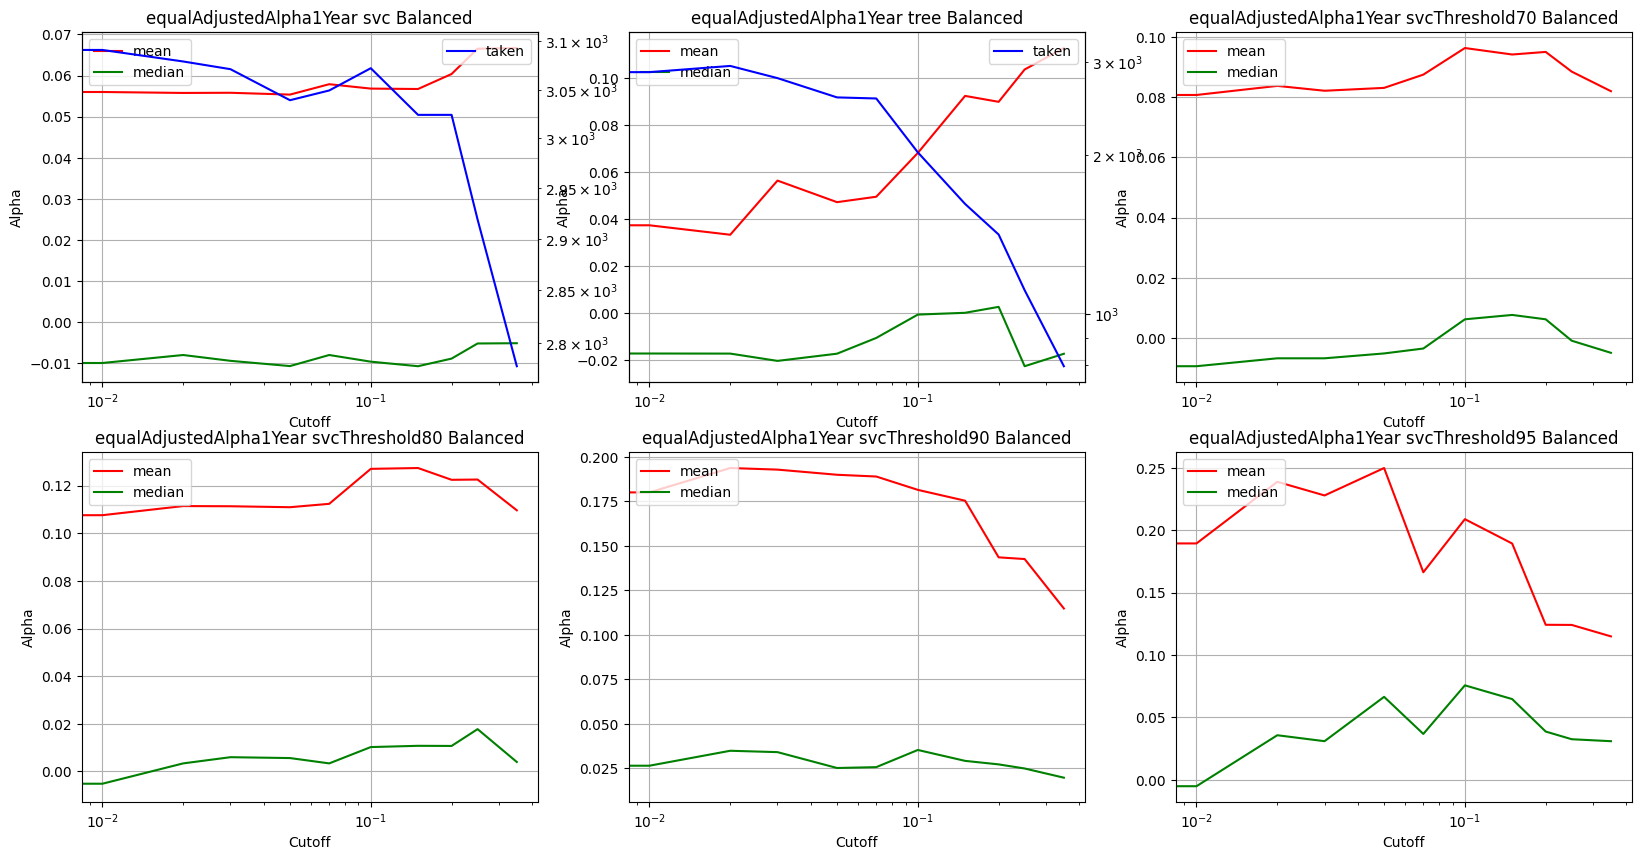

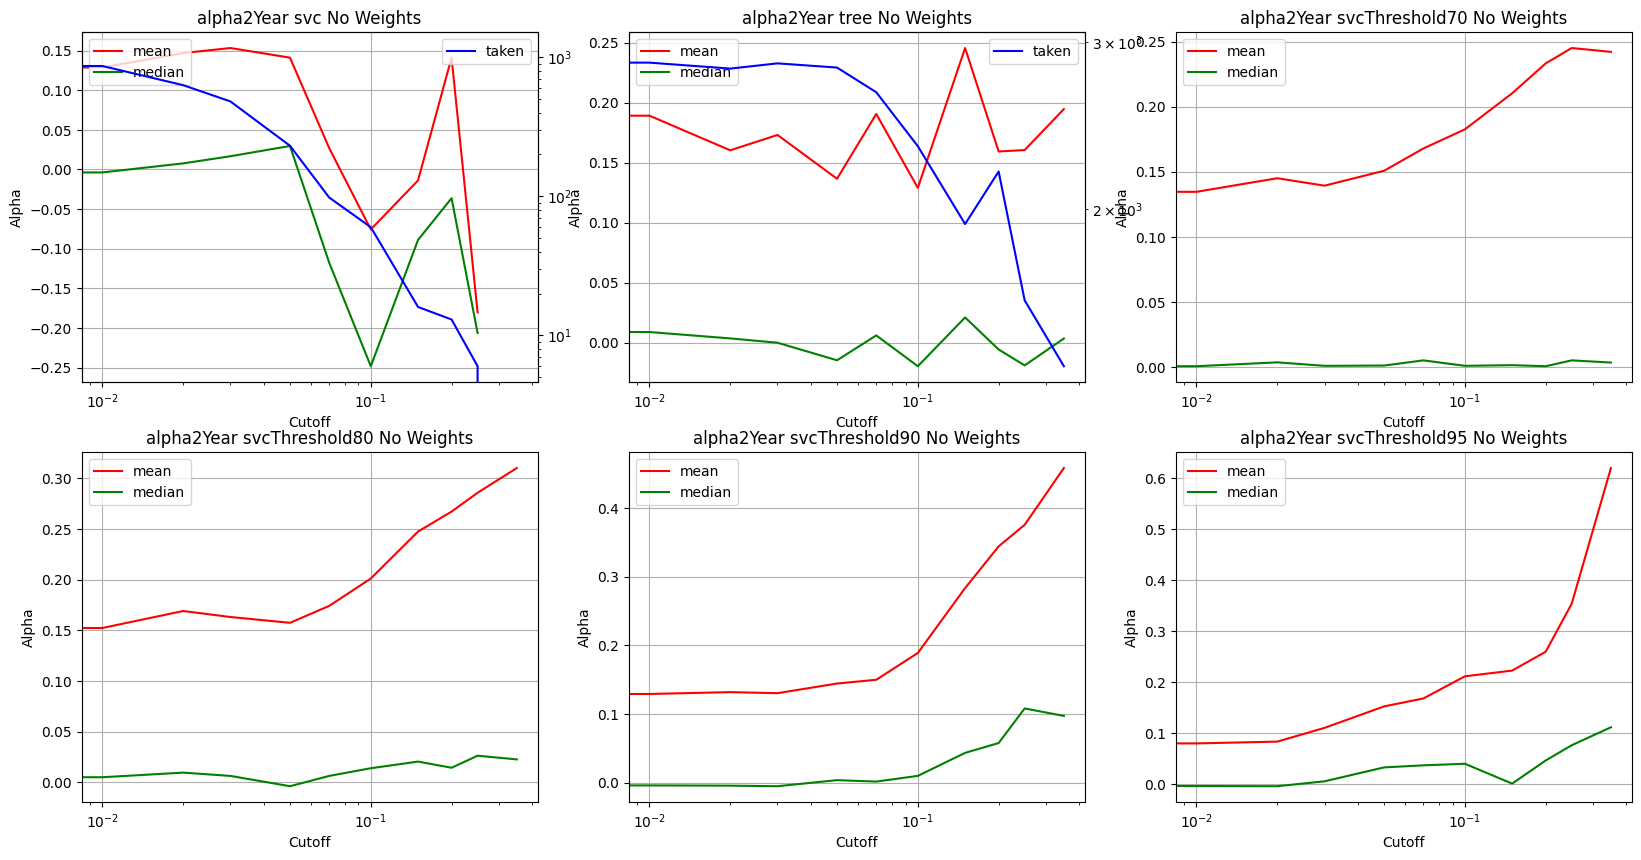

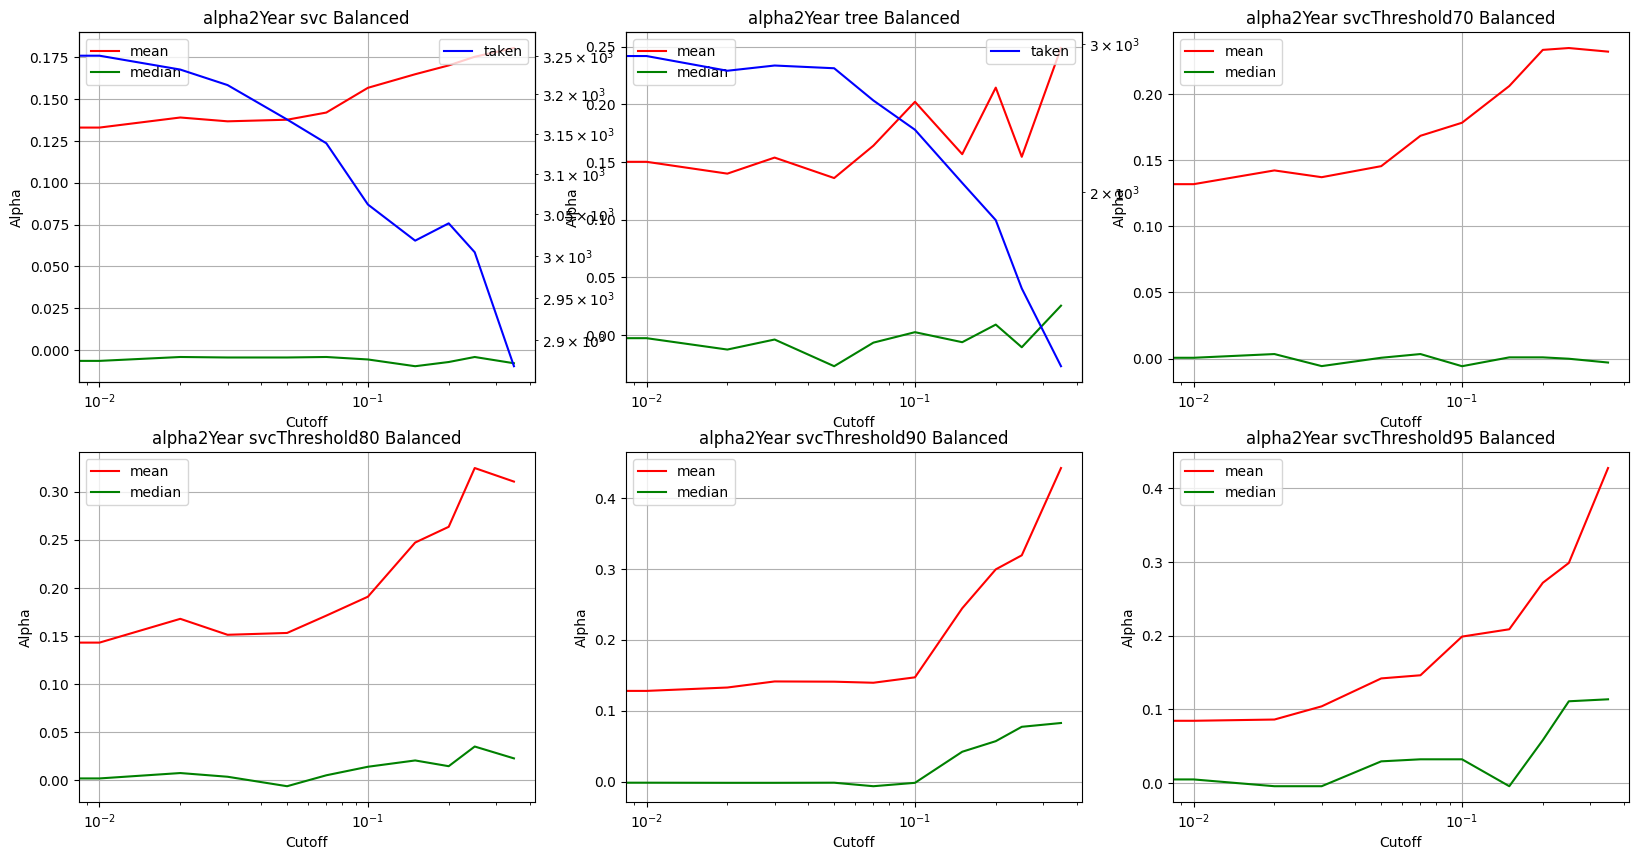

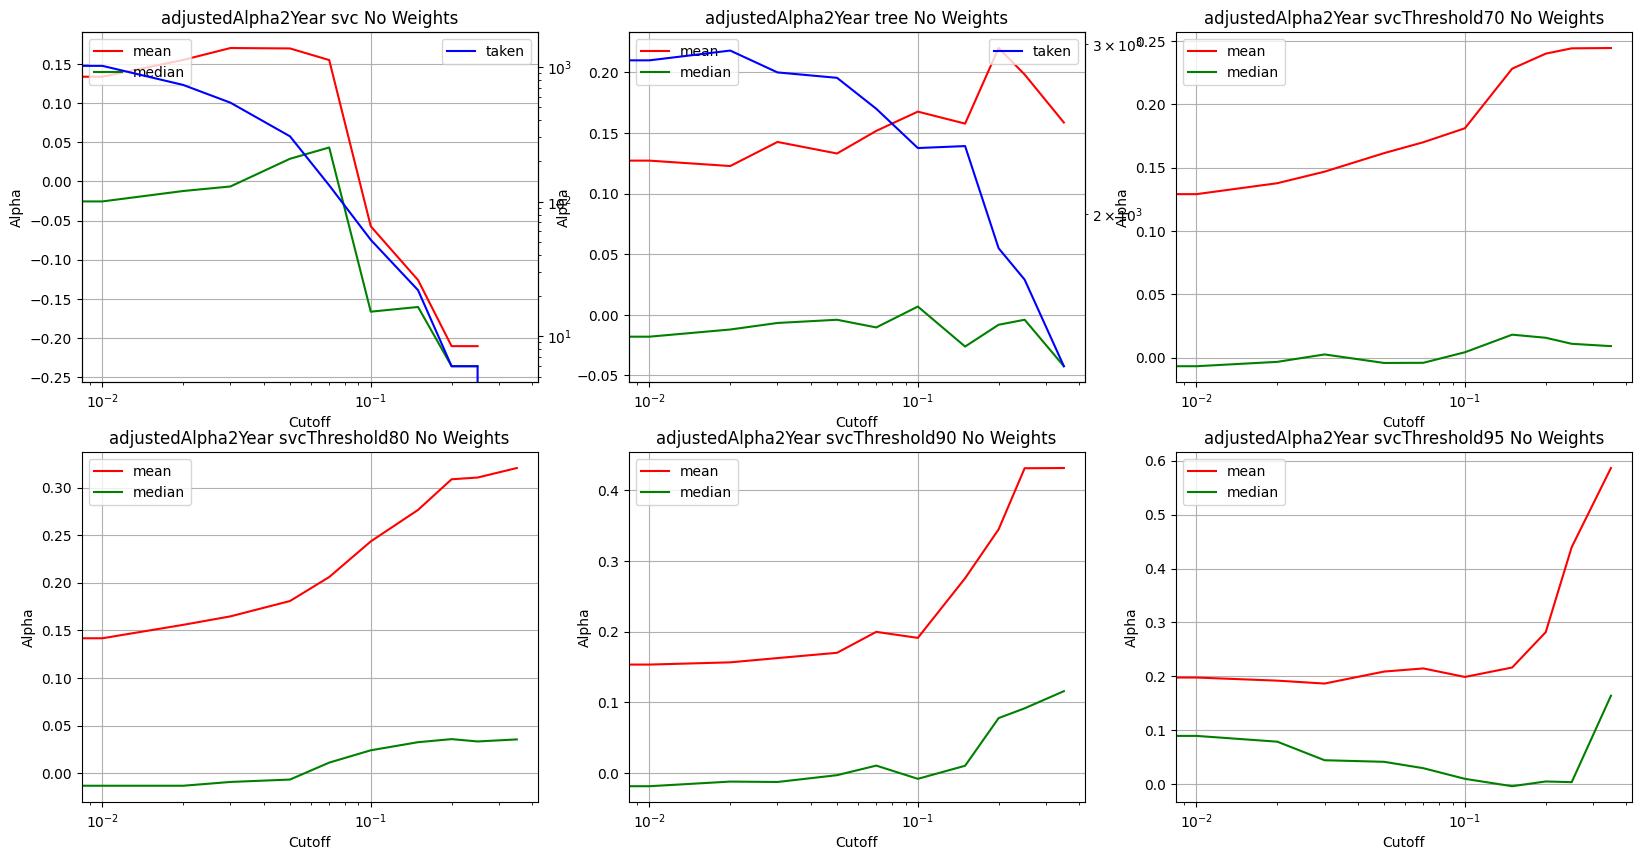

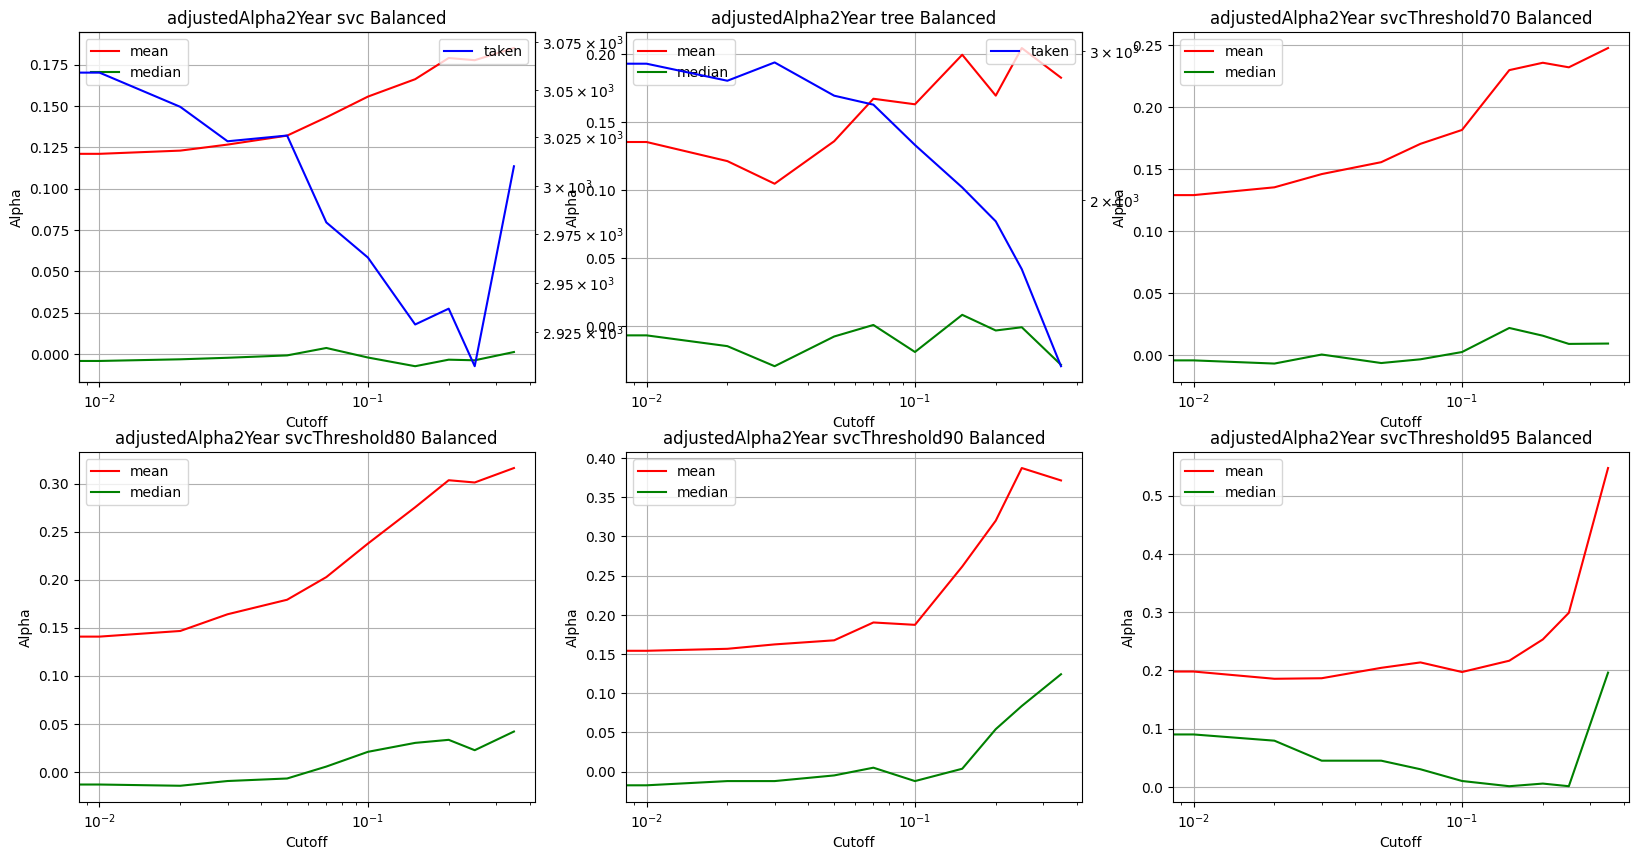

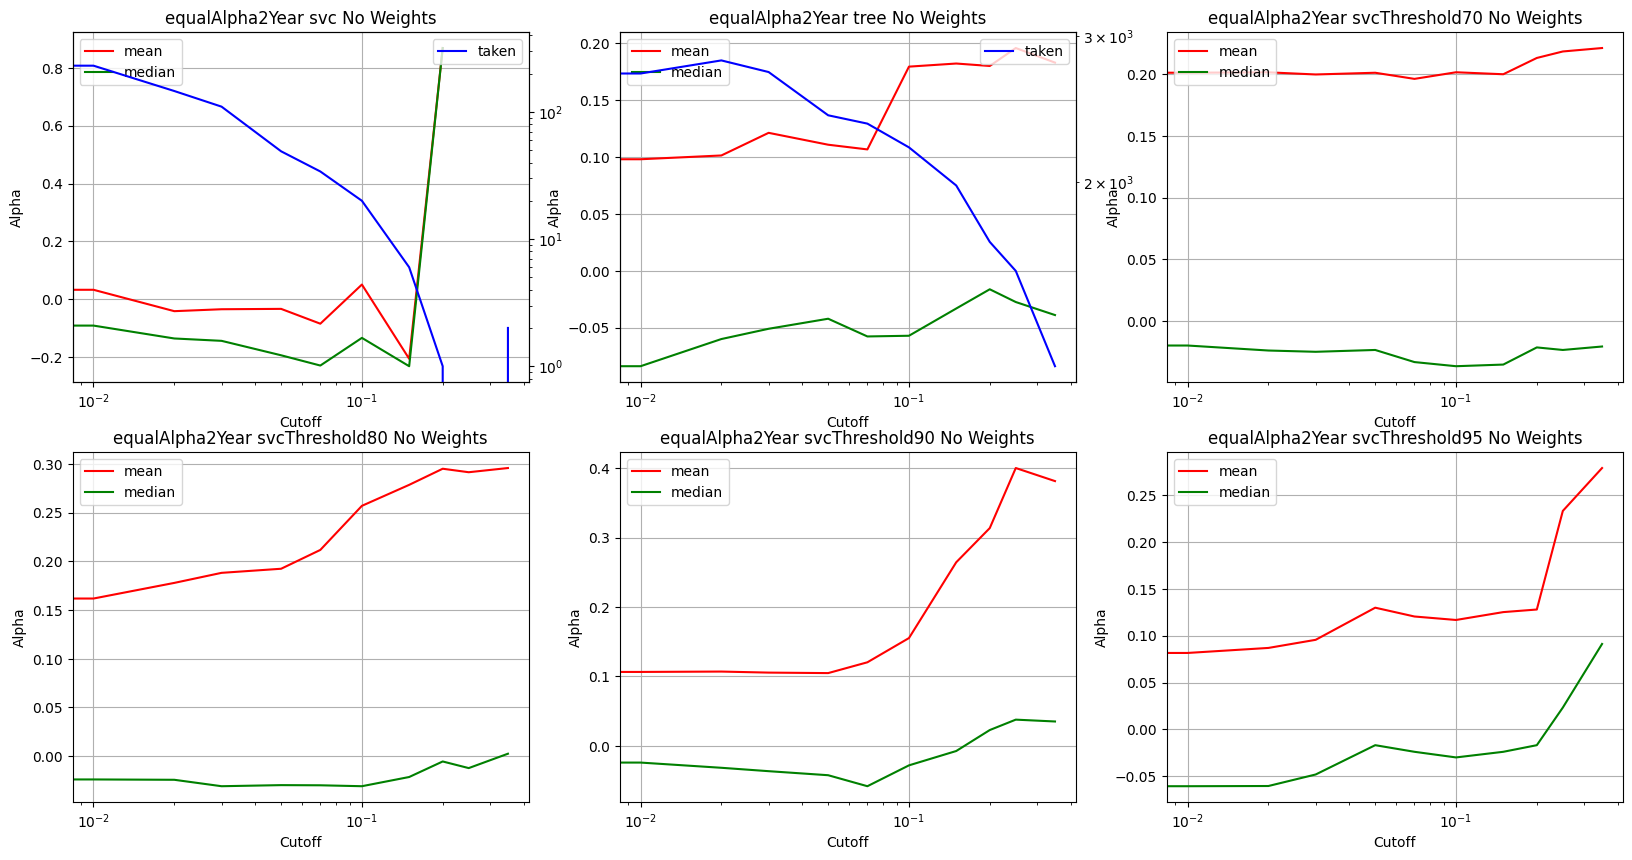

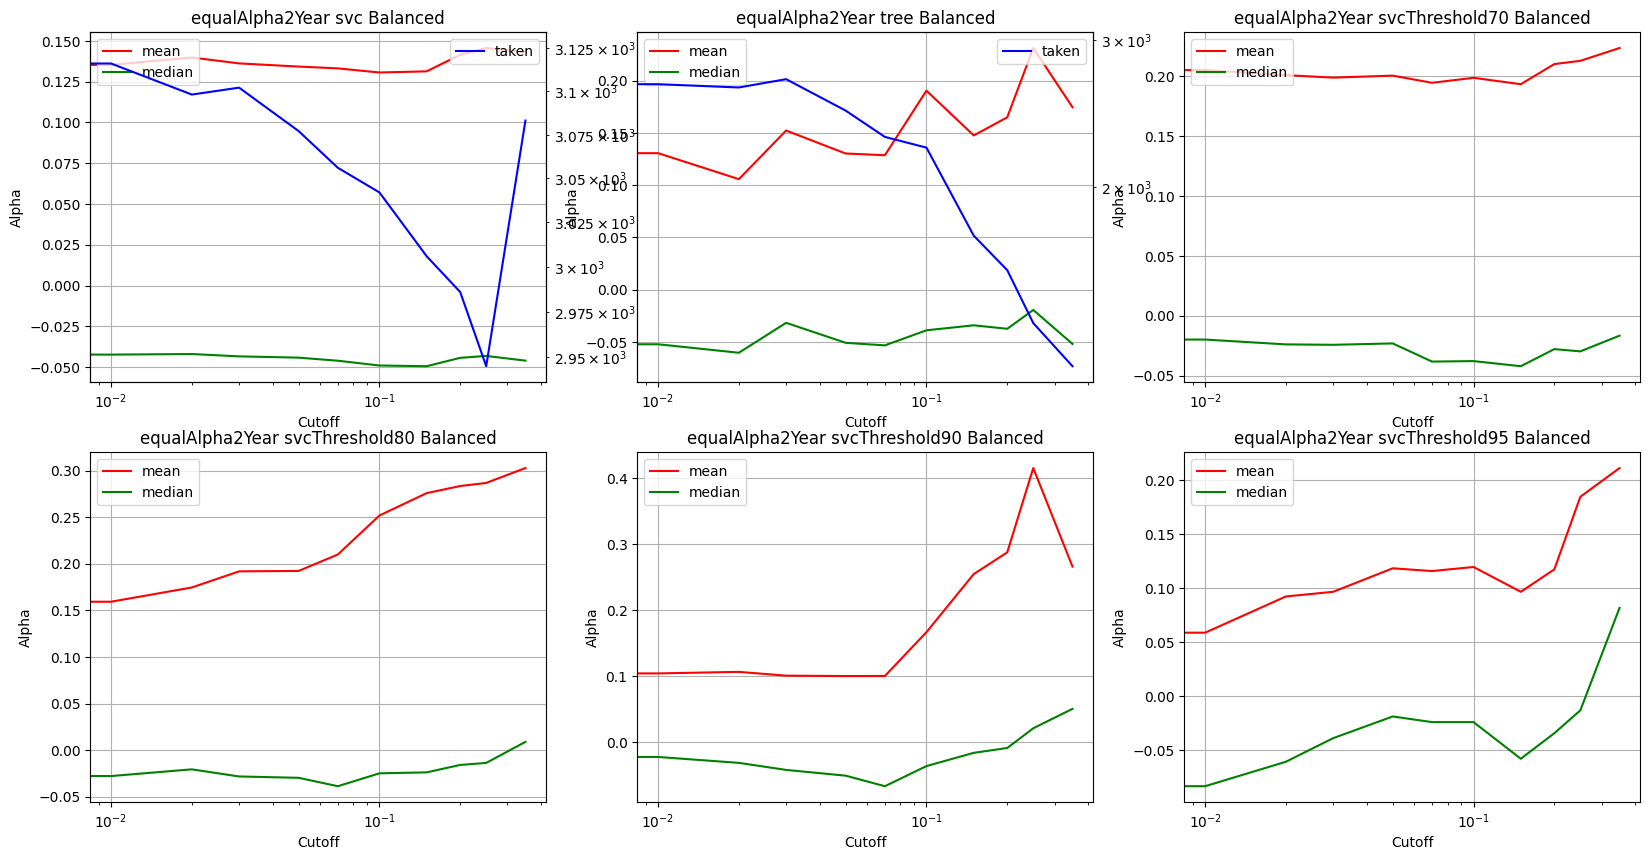

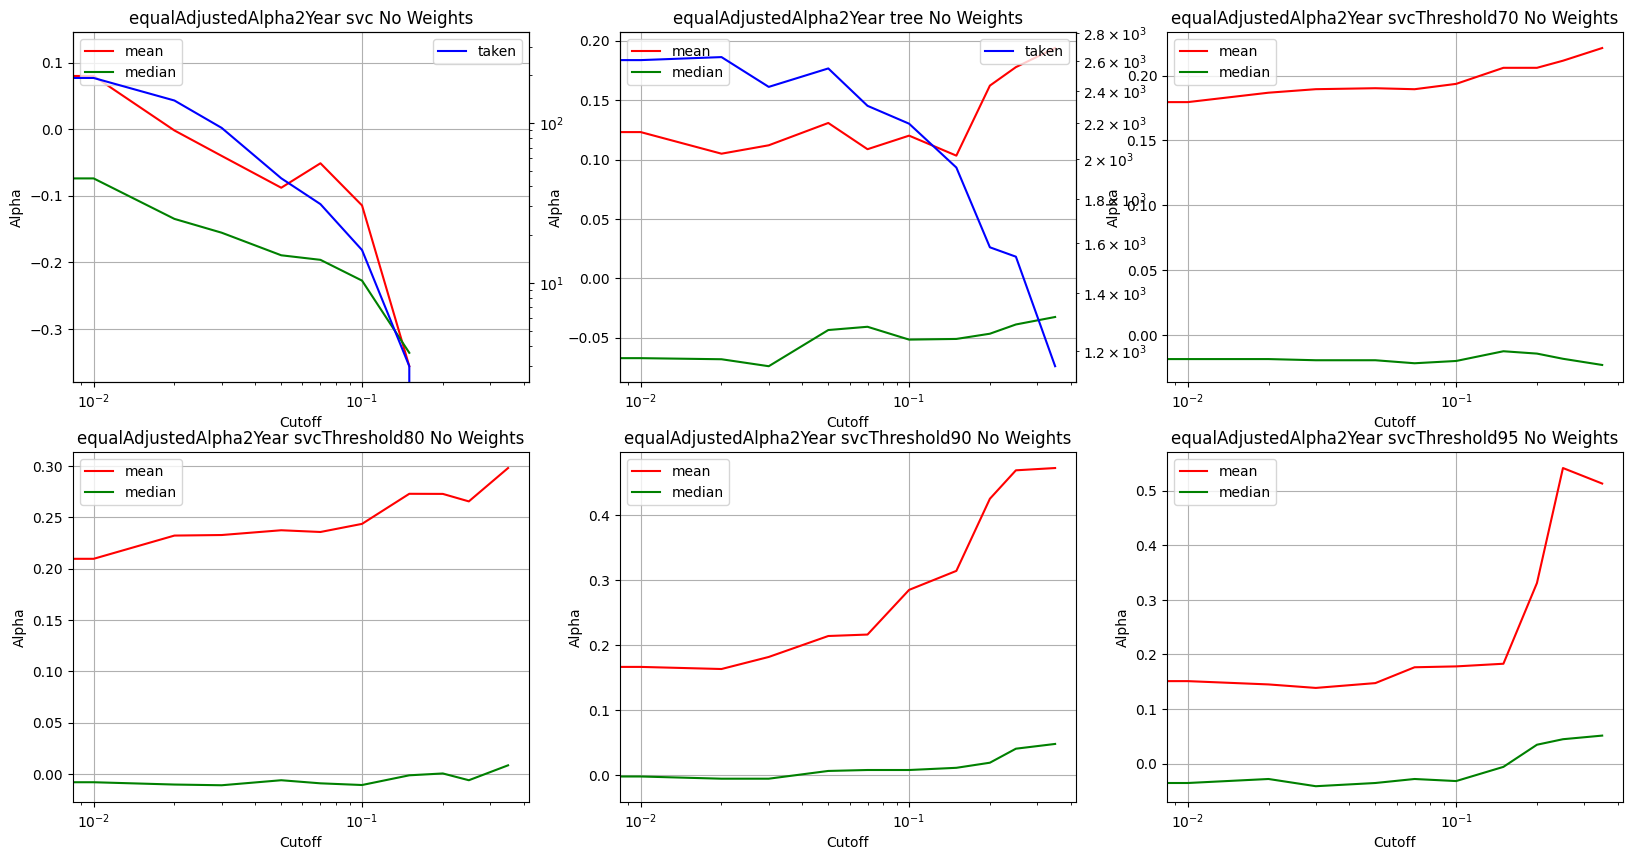

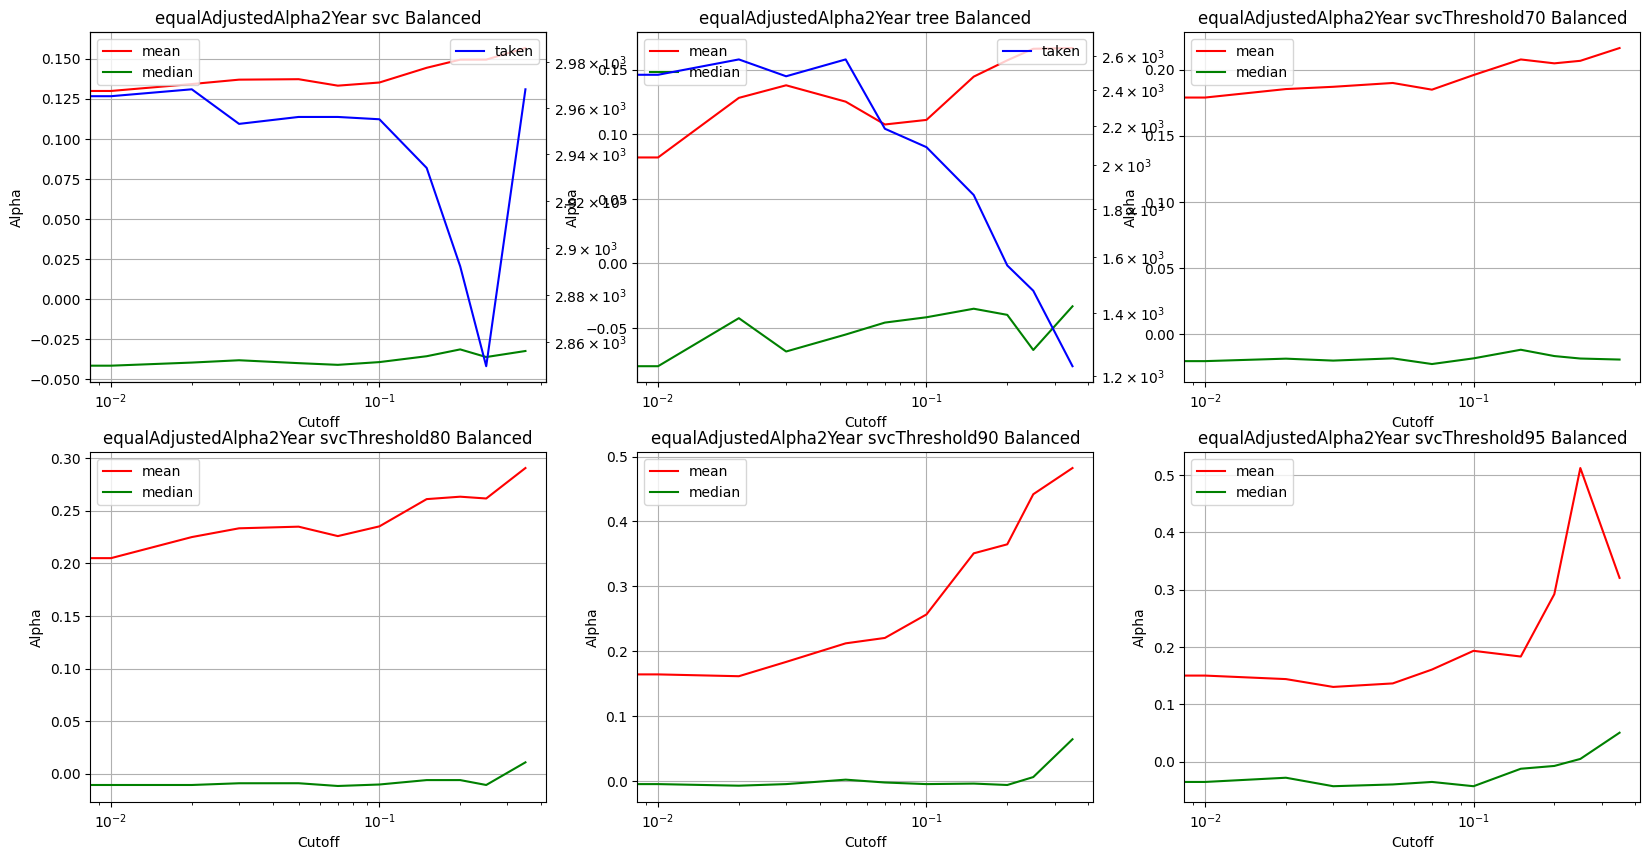

In [16]:
for yLabel in resultsToPlotCompany.keys():
    thresholdKeys = [f'svcThreshold{threshold}' for threshold in thresholds]
    toPlot = resultsToPlotCompany[yLabel]

    drawFrom1results(resultsToPlotCompany[yLabel], yLabel, cutoffs, title='No Weights', keys=['svc', 'tree', *thresholdKeys])
    plt.show()

    drawFrom1results(balancedResultsCompany[yLabel], yLabel, cutoffs, title='Balanced', keys=['svc', 'tree', *thresholdKeys])
    plt.show()

resultsToPlotRand AND balancedResultsRand

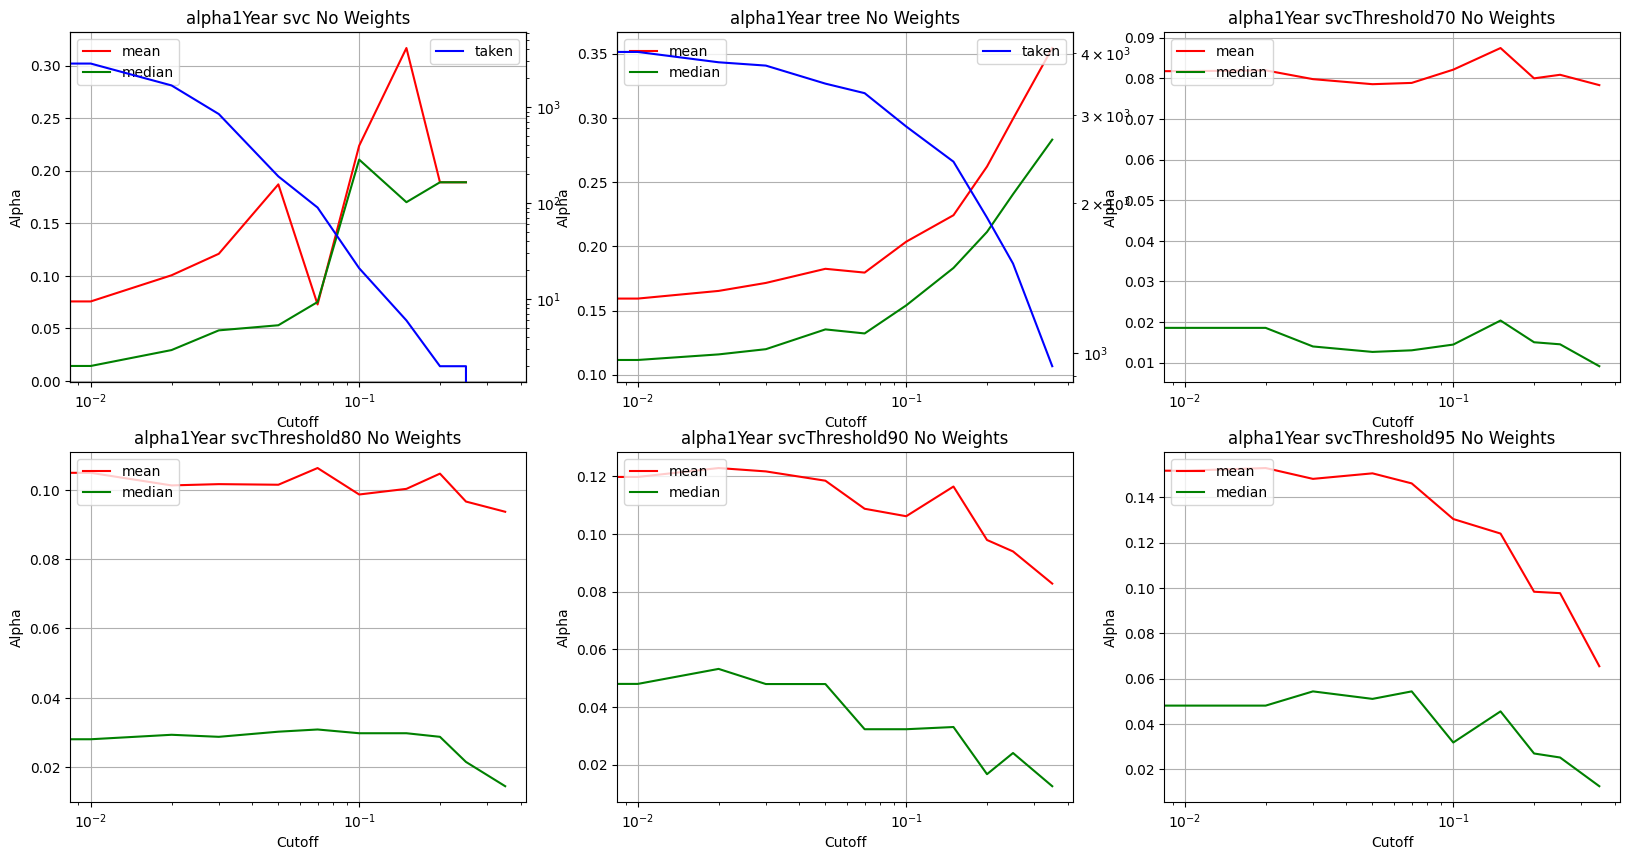

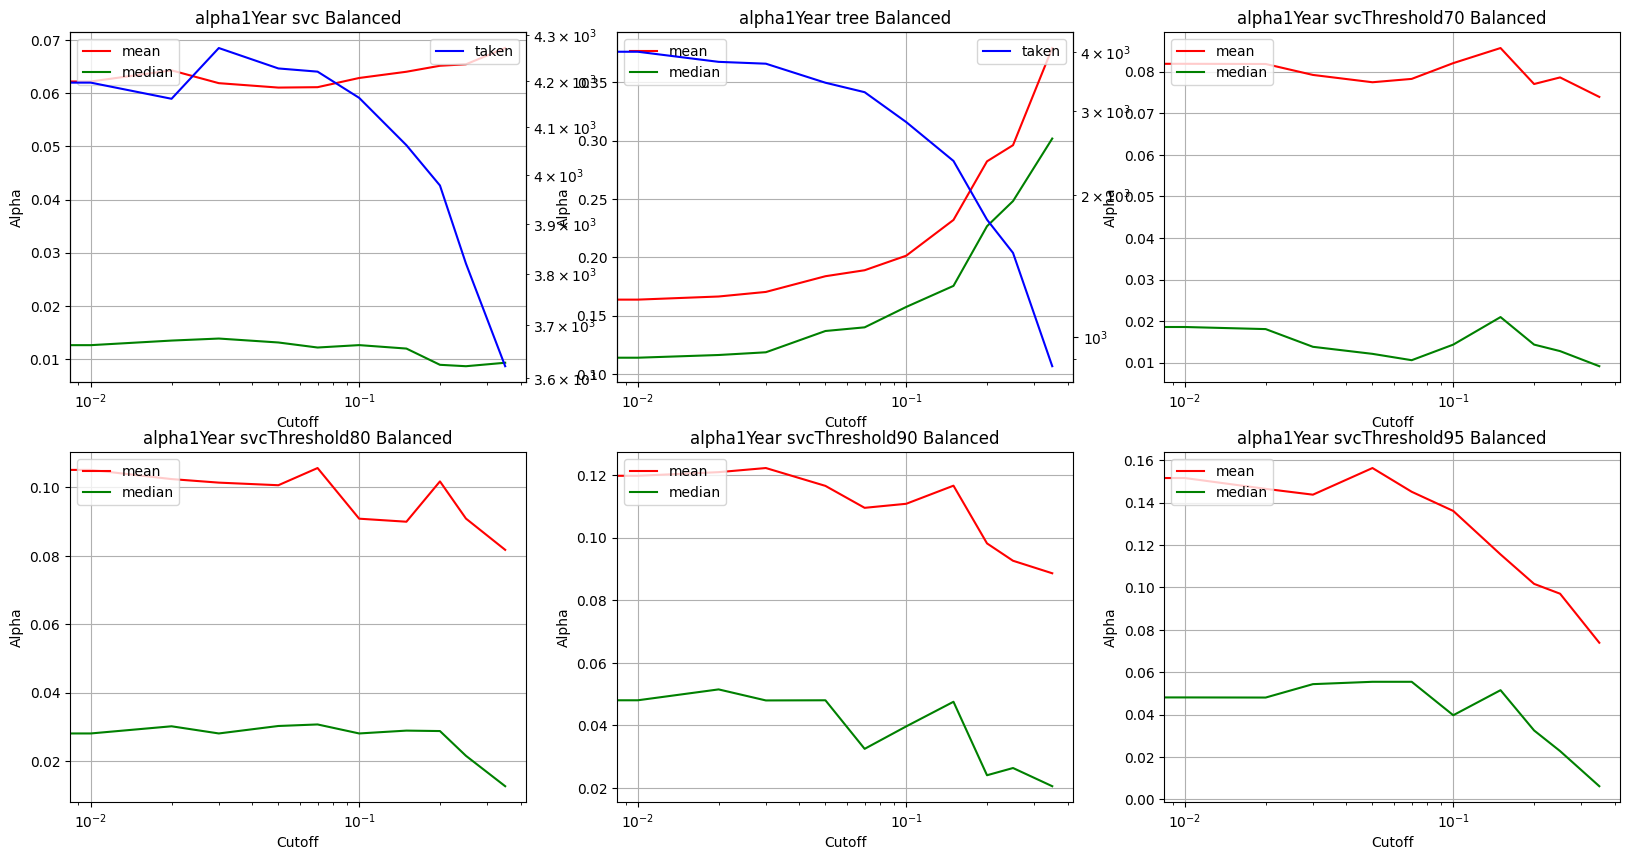

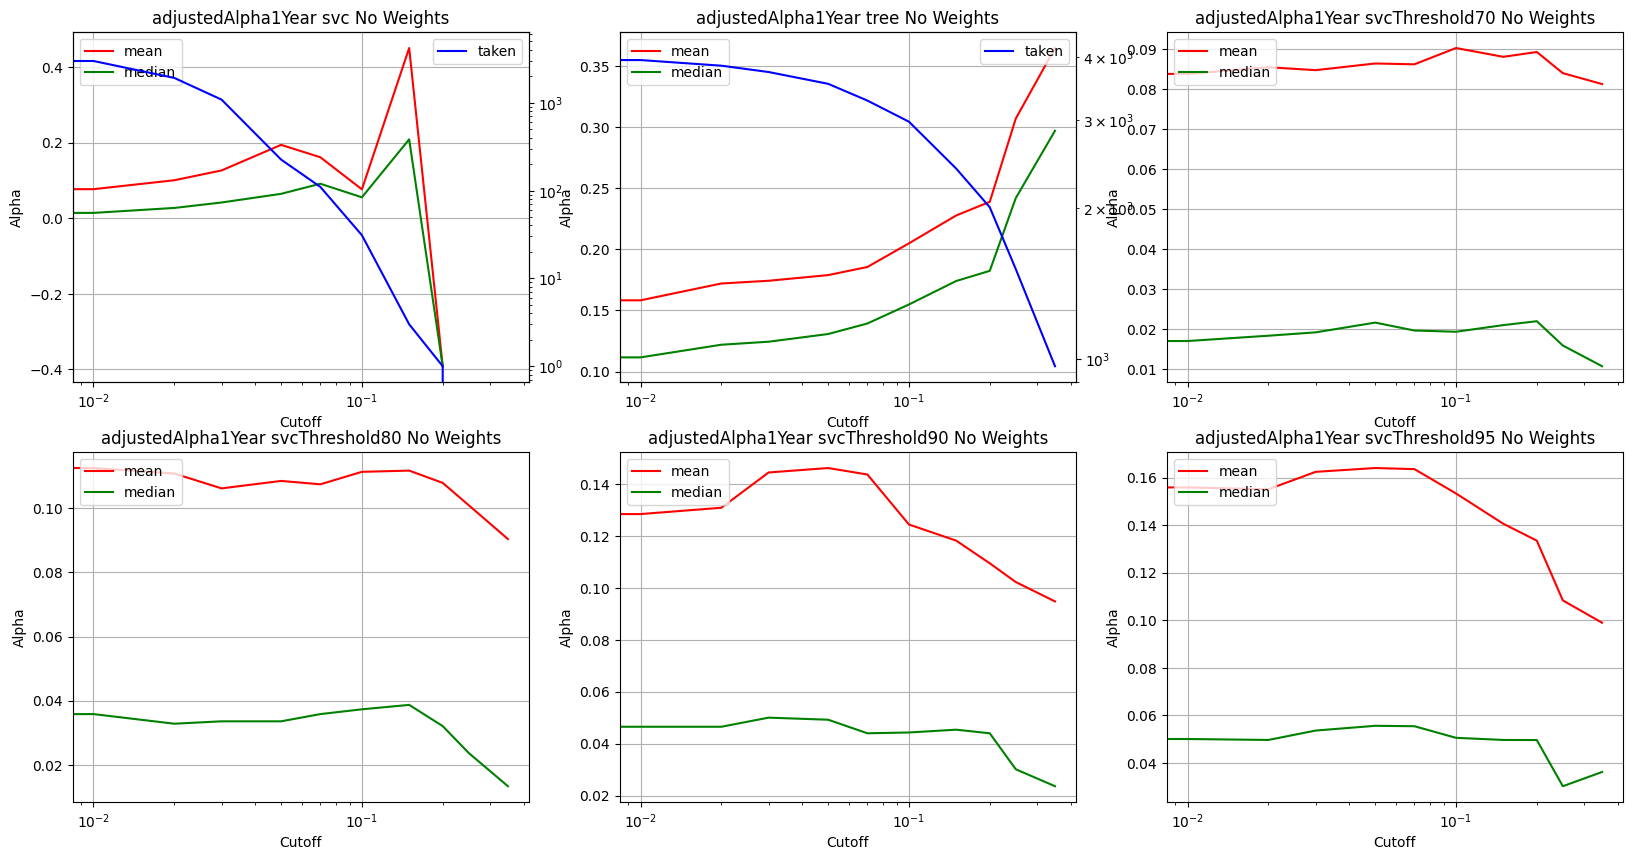

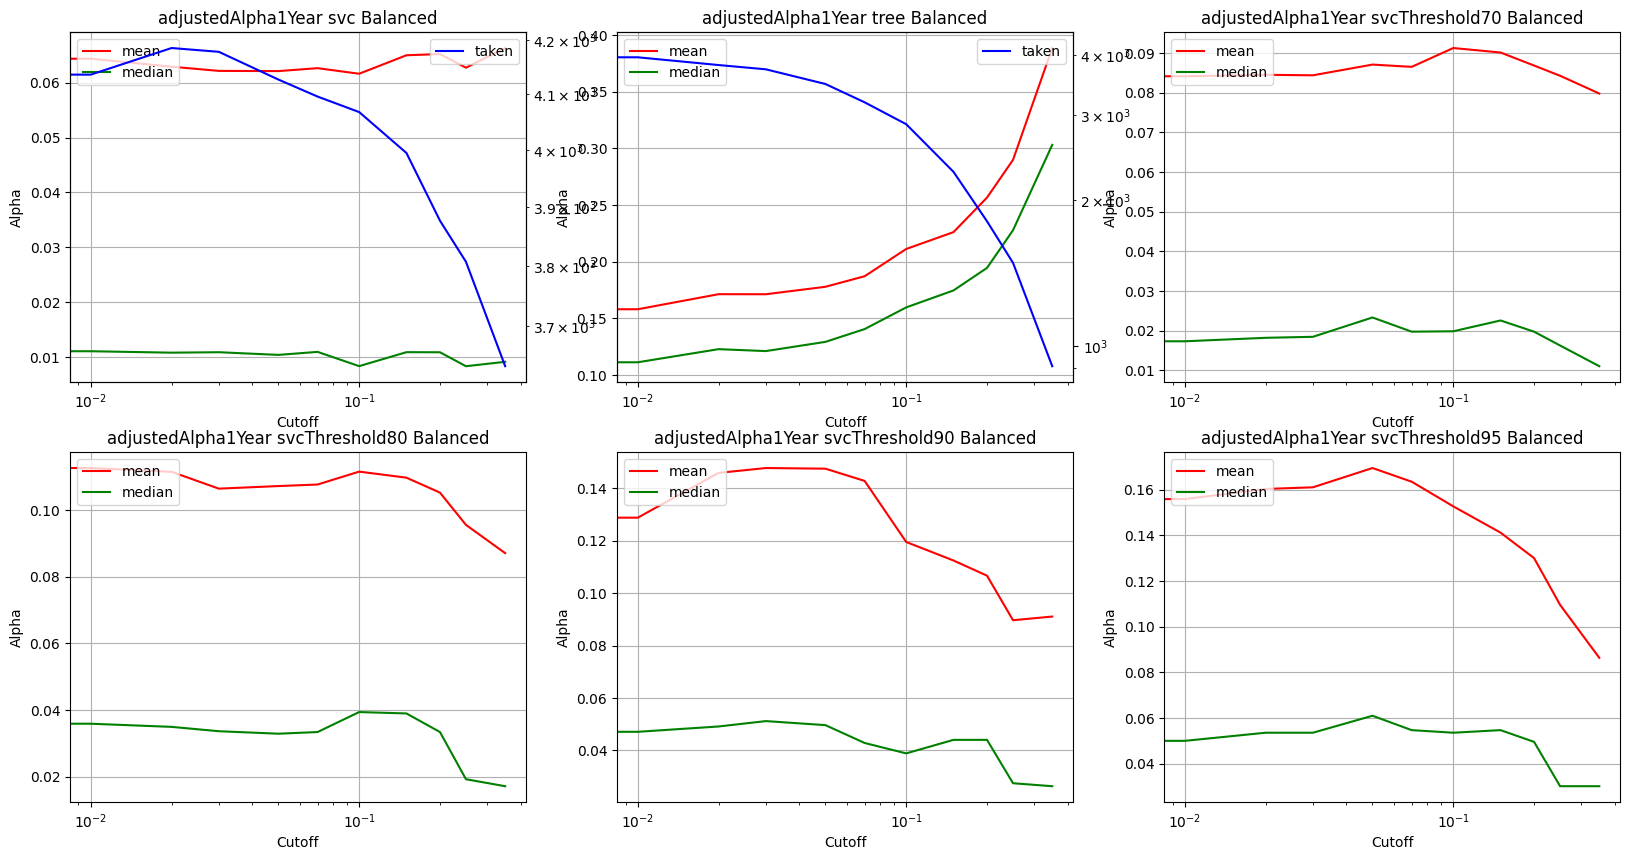

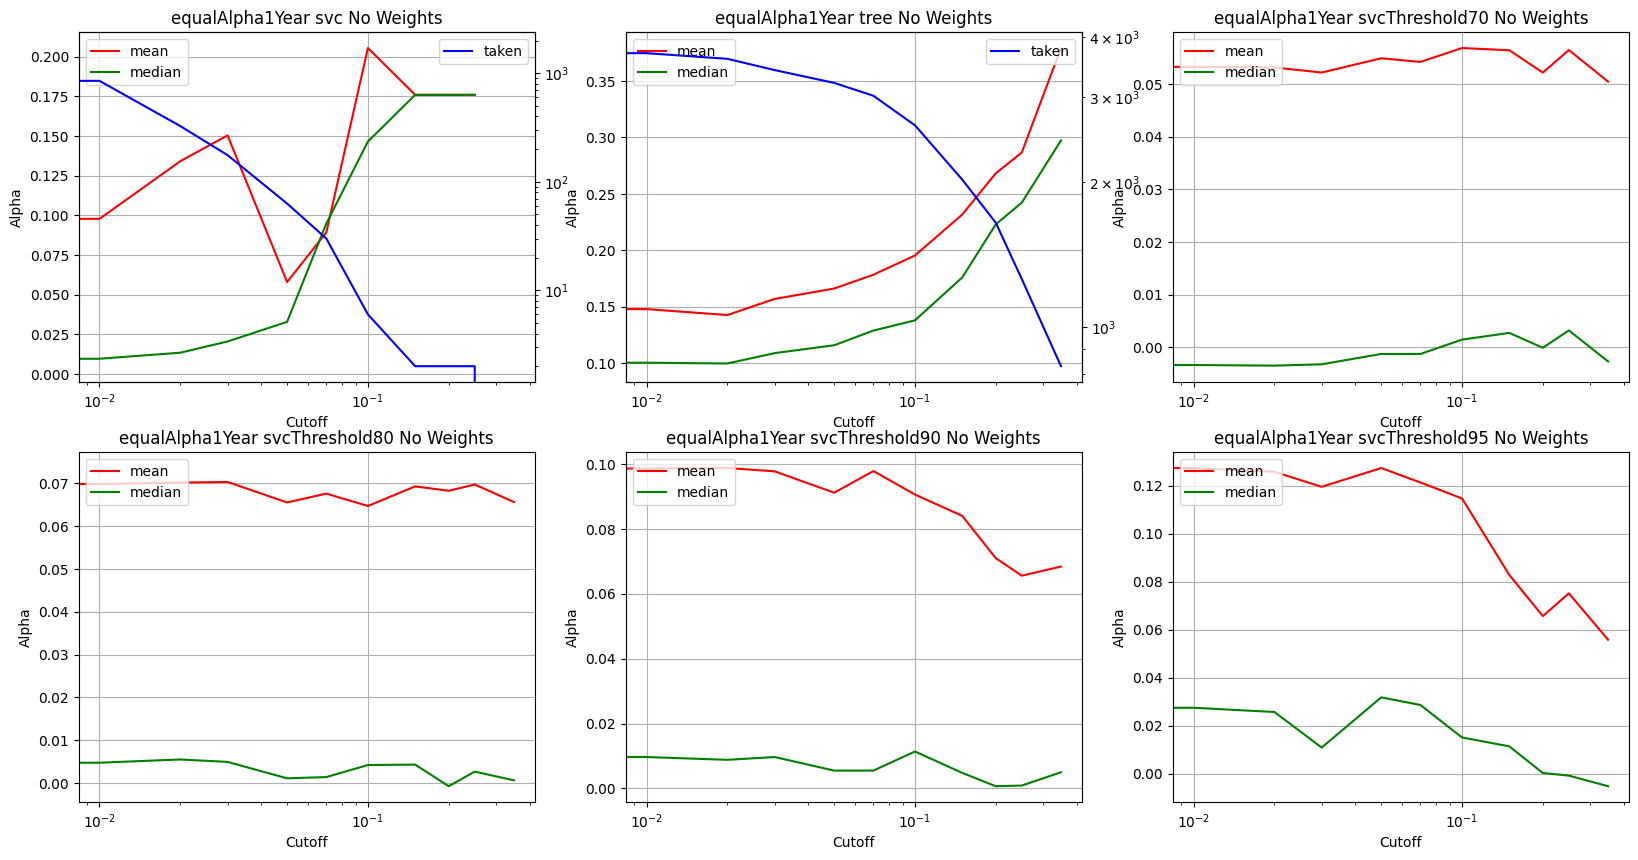

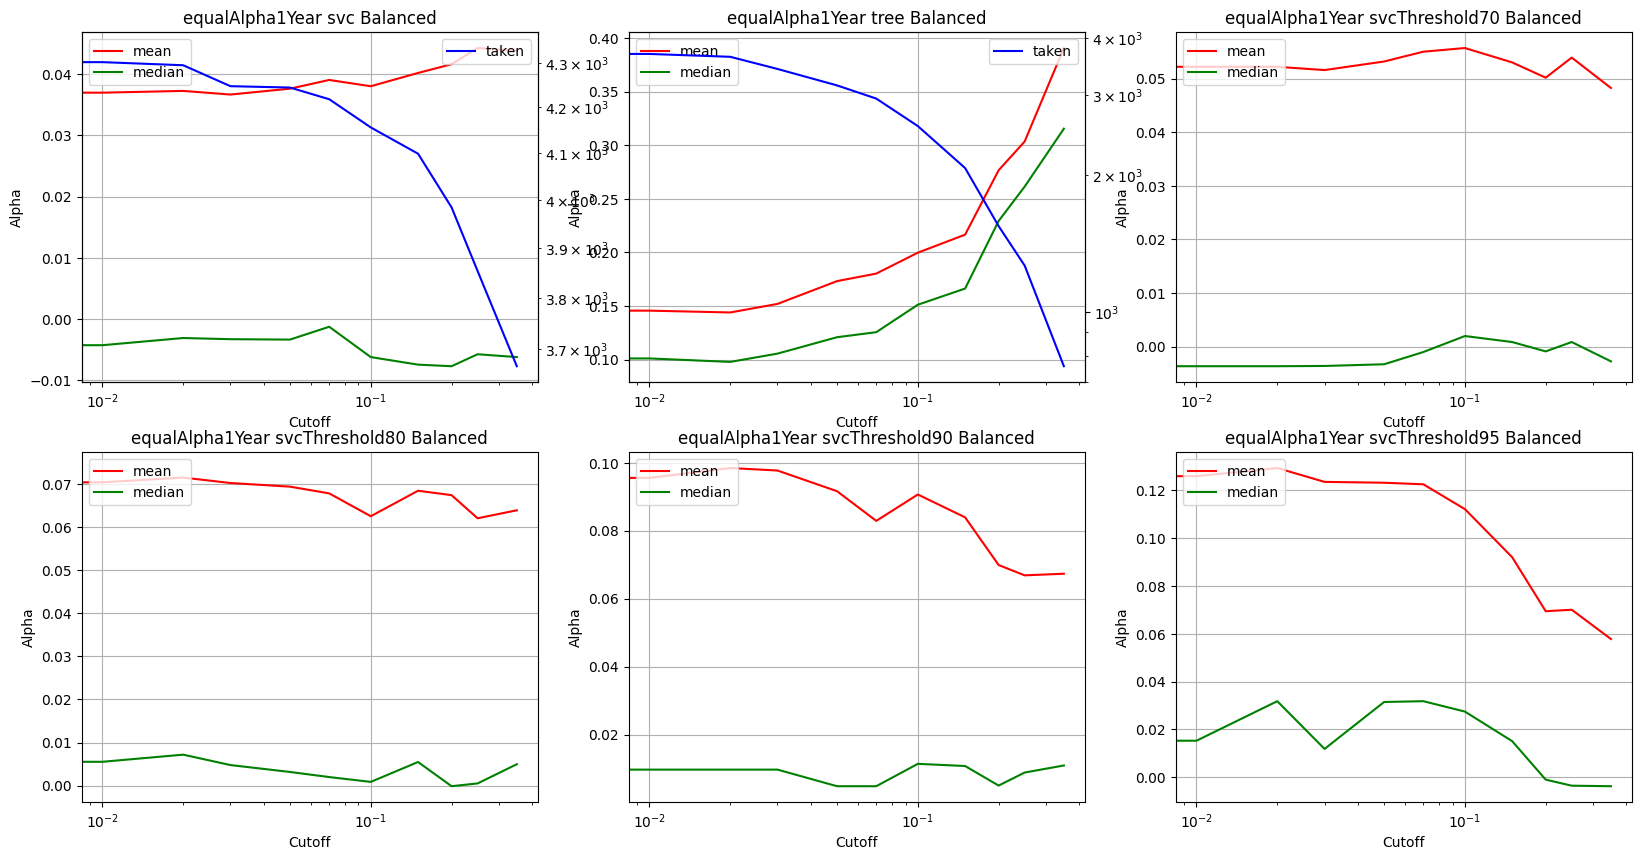

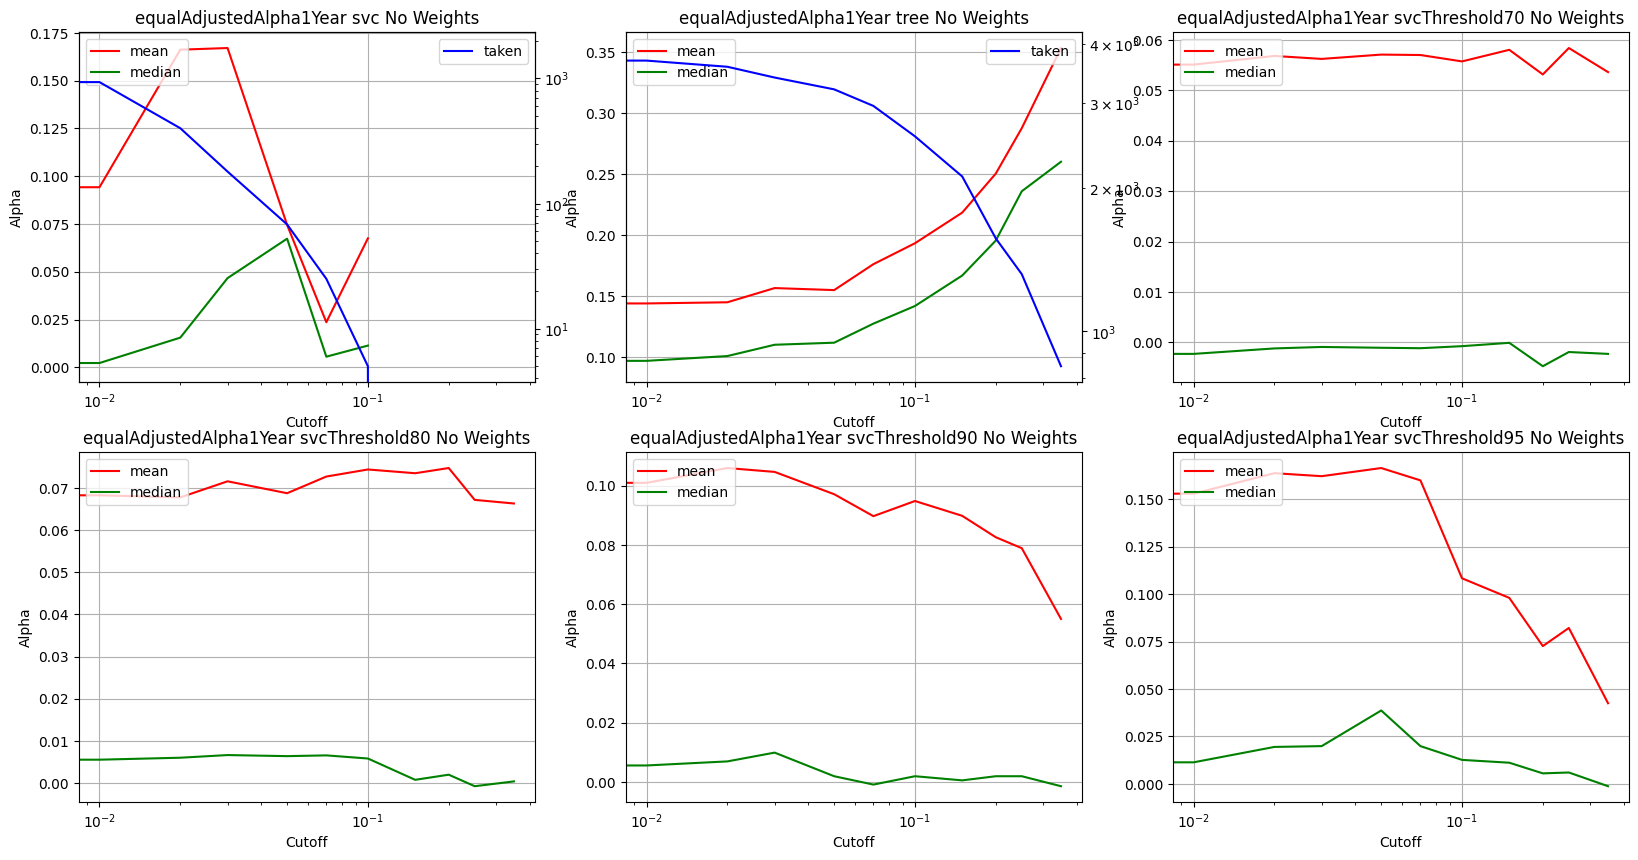

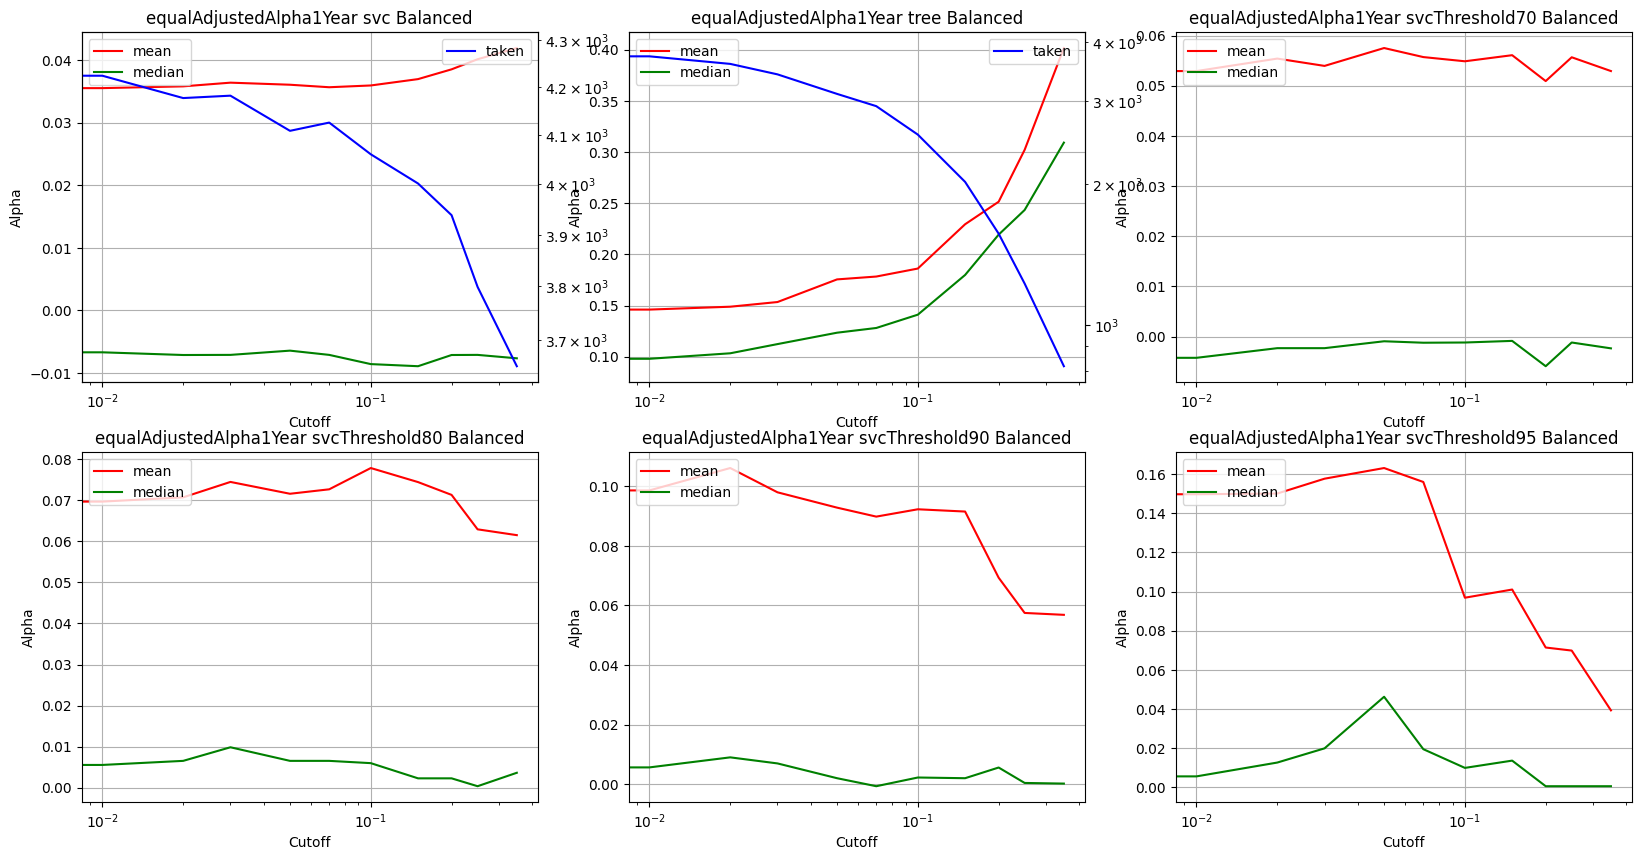

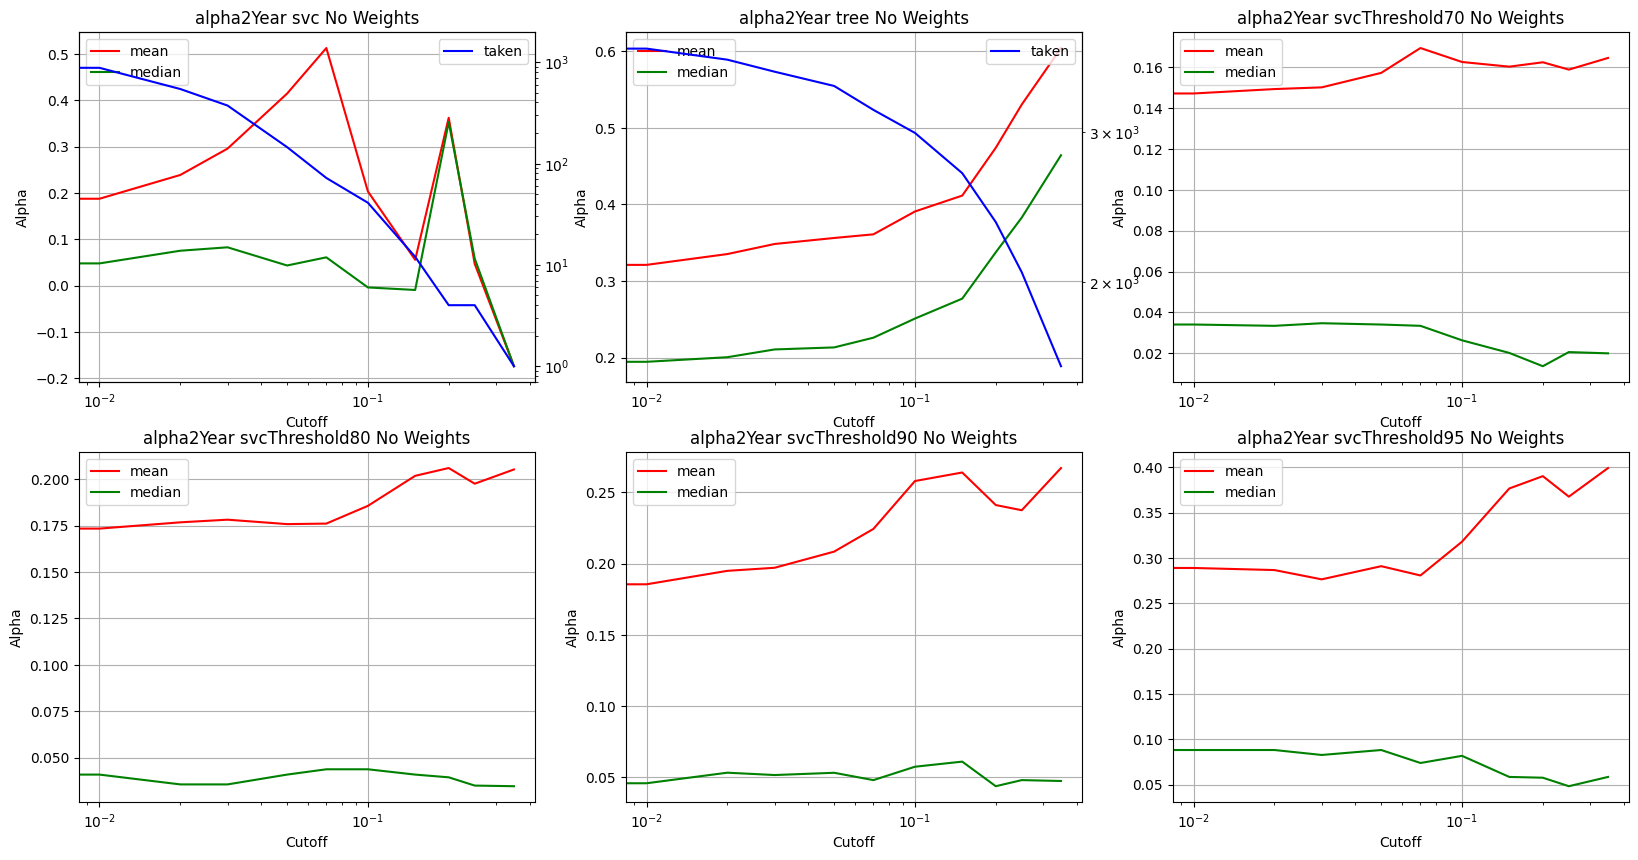

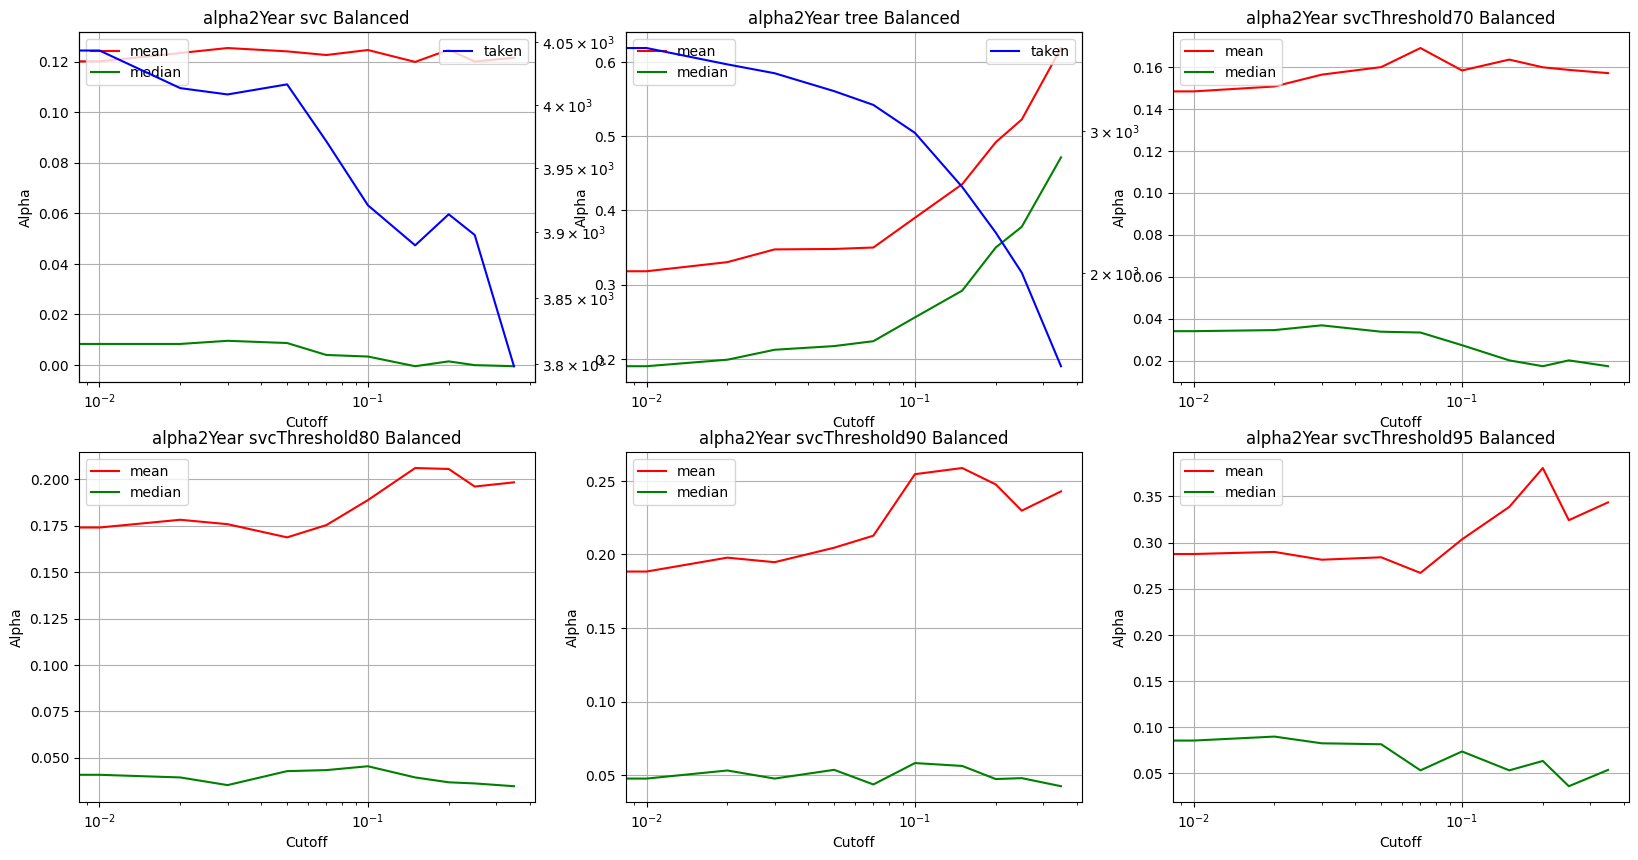

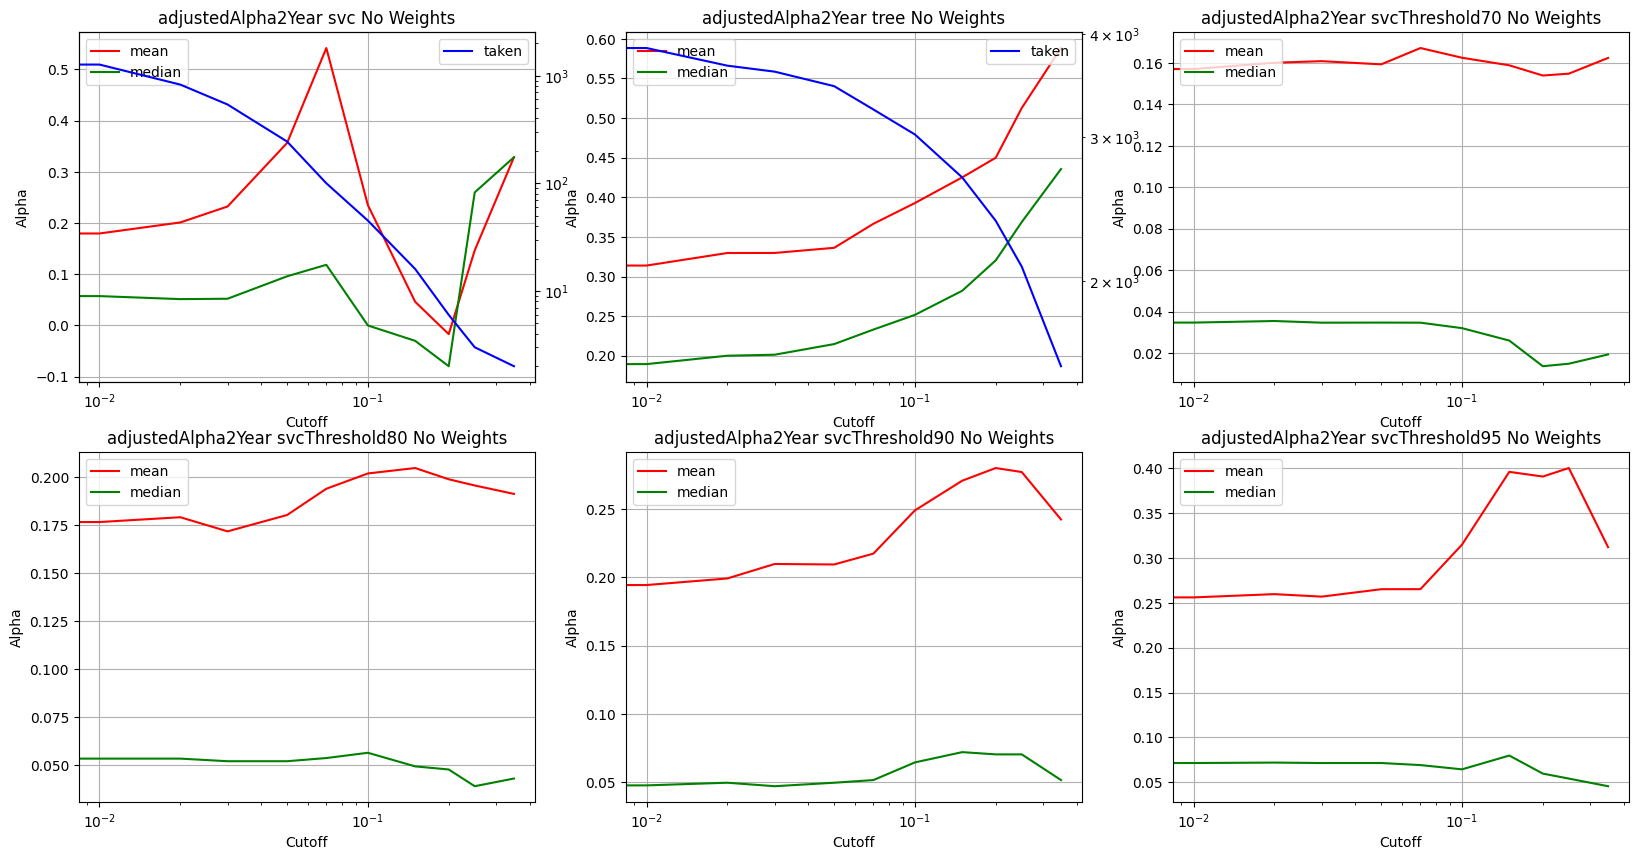

In [ ]:
for yLabel in resultsToPlotRand.keys():
    thresholdKeys = [f'svcThreshold{threshold}' for threshold in thresholds]
    toPlot = resultsToPlotRand[yLabel]

    drawFrom1results(resultsToPlotRand[yLabel], yLabel, cutoffs, title='No Weights', keys=['svc', 'tree', *thresholdKeys])
    plt.show()

    drawFrom1results(balancedResultsRand[yLabel], yLabel, cutoffs, title='Balanced', keys=['svc', 'tree', *thresholdKeys])
    plt.show()